# 2 DO

* Add percentages for job words
* Add cluster cross tables for:
 * city
 * job title
 * company
* Finish classifer/hyperparameter descriptions
* Add Precision/Recall Curves for all classifiers
* Add ROC curves for all classifiers
* make all classifiers predict probabilities
* Complete voting classifiers

# Analyzing Job Description Data: MBA VS Data Scientist

## Introduction

As technology has permeated through industry, the rise of data science and machine learning has led to many breakthroughs, innovations and discoveries as to how companies can shape and execute business strategy.  The data scientist has thus become an indespensible part of the business.  Contrast this meteoric rise to that of a more traditional business leader, the MBA.  While these individuals are skilled at specific aspects of running a business such as management, marketing, operations or finance, there exists an ever growing opportunity to enhance and empower such business expertise with data and scientifically-backed analysis and tools.

We have entered a time where the gulf between science and business management is becoming ever more narrow.  Companies need decisive leaders backed by a technical rigor and an innovative embrace.  Ergo, we need both MBAs and Data Scientists to lead our businesses in 2017 and beyond.

### Objective

In this analysis, we will explore the similarities and differences between the roles of MBA and Data Scientist as revealed through a comprehensive look at current trends in the job markets for both roles.

We will also develop, test and tweak machine learning models with the aim of accurately classifying job postings as either MBA or Data Science based on the text of the given descriptions.

We will accomplish these two objectives via sequential steps outlined below.
* Visualizing and tabulating the types of companies, cities and job titles represented by each job category
* Training various classification models to determine the job category by job description
* Combining individual machine learning models with powerful ensemble techniques to achieve greater accuracy
* Exploring the classifications of the best model and digging deeper into the types of jobs that are hardest to classify.

### What is the ultimate goal?
While ....the overall objective is to explore, demonstrate and deploy sophisticated machine learning models for accurate text classification.

Potential parties who might include might benefit from this analysis:
* MBAs interested in pursuing roles related to data science.
* Data scienstists interested in purusing roles related to business management and administration.
* Managers seeking employees who fill the requirements of either (or both) role categories.


### Technical Aim

In this analysis, we will be leveraging the powerful data analysis and machine learning libraries of Python.  All analysis is coded and provided below as such.  The intent is to provide a fully reproducible analysis to enable feedback, discussions and suggestions.  The following versions of Python and respective packages are listed below:

In [1]:
import platform
platform.architecture()

('64bit', '')

In [2]:
platform.system()

'Linux'

In [3]:
platform.release()

'4.10.0-32-generic'

In [4]:
platform.version()

'#36-Ubuntu SMP Tue Aug 8 12:10:06 UTC 2017'

In [5]:
import sys
print(sys.version)

3.5.3 (default, Jul 21 2017, 01:02:33) 
[GCC 6.3.0 20170406]


In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
print(pd.__name__," ",pd.__version__)

pandas   0.20.3


In [7]:
import nltk
print(nltk.__name__," ",nltk.__version__)

nltk   3.2.4


In [8]:
import numpy as np
print(np.__name__," ",np.__version__)

numpy   1.13.1


In [9]:
import re
print(re.__name__," ",re.__version__)

re   2.2.1


In [10]:
import sklearn
print(sklearn.__name__," ",sklearn.__version__)

sklearn   0.18.2


In [11]:
import matplotlib
print(matplotlib.__name__," ",matplotlib.__version__)

matplotlib   2.0.2


In [12]:
import geopy
print(geopy.__name__," ",geopy.__version__)

geopy   1.11.0


In [13]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
print(scipy.__name__," ",scipy.__version__)

scipy   0.19.1


### Data Source

Job description data was collected from Indeed.com for most of the large cities in the United States.  For collection purposes, the Indeed.com job search API was utilized over a period of _____ in mid 2017.  A notebook outlining the methogology and code for collecting and storing the data on a daily basis can be found here _____ for those who are interested.

In [37]:
df_mba = pd.read_csv("https://raw.githubusercontent.com/CollierKing/Classify_Jobs_Indeed/master/indeed_mba_jobs.csv",encoding = "ISO-8859-1")
df_mba['category'] = "mba"
df_data_sci = pd.read_csv("https://raw.githubusercontent.com/CollierKing/Classify_Jobs_Indeed/master/indeed_datasci_jobs.csv",encoding = "ISO-8859-1")
df_data_sci['category'] = "data_science"

## Data Pre-processing

In the following section we will explore the data by looking at the geographical distribution of jobs, compositions of jobs in companies and cities. We have a little over 100k job listings in our dataset.

In [38]:
df_combined = df_mba.append(df_data_sci)

In [39]:
df_combined.shape

(101767, 7)

Lets take a quick glance at the data. We have several columns of interest such as Job Location, Company, Job Title and 'Snippet.' Snippet is a truncated text field with the description for the particular job.

In [40]:
df_combined.head(5)

,Location,Company,Date,Job_Key,Job_Title,Snippet,category
0,"Austin, TX",Kasasa,2017-05-24,a44def7958691957,Executive Strategist,Must be service oriented and willing to selflessly collaborate with the field sales team and internal corporate teams in a respectful and encouraging way at all times. The Executive Strategist assists in the sales strategy training of client facing teams and provides thought leadership and identifies opportunities to develop and implement solutions that will drive results in all areas of the sales...,mba
1,"Austin, TX",Texas Windstorm Insurance Association,2017-05-25,382cc710feb5f483,Chief Actuary,"A bachelor?s degree, preferably in the areas of actuarial science,. Develop data retrieval, categorization, and. At least ten years of technical experience in. FCAS (Fellow - Casualty Actuarial Society)....",mba
2,"Austin, TX",Otto Bock Healthcare LP,2017-05-24,568c85b4c93984f3,"Senior Director, Commercial Services","BA in Business, Marketing or related field, MBA Strongly preferred. Drive consistent sales training and development across the business units, partnering with Sales leaders accordingly i.e. Sales Process, Presentation and Onboarding tools. Proven analytical and business writing skills i.e. annual business plans, data analysis reporting and profit models....",mba
3,"Austin, TX",Otto Bock Healthcare LP,2017-05-24,849868dc1a367512,Market Manager - Orthotics,"Responsible for working with Marketing Communications to develop product launch materials, product related communication to all relevant target groups through public relations, direct mailings, conferences, trade shows and other industry events. Develop Key Opinion Leader network, Reference and Influencer strategies to maximize awareness of Ottobock?s full portfolio of solutions across all...",mba
4,"Austin, TX",Otto Bock Healthcare LP,2017-05-24,fde27361782c9f0b,Market Manager Prosthetics,"Responsible for working with Marketing Communications to develop product launch materials, product related communication to all relevant target groups through public relations, direct mailings, conferences, trade shows and other industry events. This individual will develop marketing plans, promotions, positioning and pricing strategies to ensure the portfolio achieves budget expectations....",mba


We will also remove any duplicate listings, listings with the same 'job_key' will be condensed:

In [47]:
df_combined.drop_duplicates(subset="Job_Key",keep="last",inplace=True)
df_data_sci.drop_duplicates(subset="Job_Key",keep="last",inplace=True)
df_mba.drop_duplicates(subset="Job_Key",keep="last",inplace=True)

Looking at the proportions of job categories in our data, we see we have more 'data science' jobs than 'mba' jobs. So we will be dealing with a slightly imbalanced classification problem later in the classification phase.

In [48]:
df_combined.groupby('category').size()

category
data_science    58384
mba             41627
dtype: int64

In [49]:
df_combined.shape

(100011, 7)

### Cleaning Text

Now we will begin to look at the actual text in the job descriptions. This text will later become the classification features of our models. In order to not 'game' the classification process, we will remove some overly descriptive terms from the job descriptions, which might tip the algorithm as to the actual category its classifying.  These terms include "MBA", "Data Scientist" and like terms.

In [50]:
df_data_sci_clean = df_data_sci
df_mba_clean = df_mba

In [51]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/collier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
# add custom stopwords
stop_plus = ["mba",
             "m.b.a",
             "masters of business administration",
             "masters in business administration",
             "data scientist","data science",
             "science"]
# combine stopword lists
stop = stop + stop_plus

In [53]:
df_data_sci_clean['Snippet'] = df_data_sci_clean['Snippet'].apply(preprocessor)
df_data_sci_clean['Snippet'] = df_data_sci_clean['Snippet'].apply(lambda x: [item for item in str.split(x) if item not in stop])
df_mba_clean['Snippet'] = df_mba_clean['Snippet'].apply(preprocessor)
df_mba_clean['Snippet'] = df_mba_clean['Snippet'].apply(lambda x: [item for item in str.split(x) if item not in stop])

In [54]:
df_data_sci_clean['Snippet'] = df_data_sci_clean['Snippet'].apply(lambda x: ' '.join(x))
df_mba_clean['Snippet'] = df_mba_clean['Snippet'].apply(lambda x: ' '.join(x))

In [55]:
df_combined_clean = pd.concat([df_data_sci_clean,df_mba_clean])

### Tokenizing Text

In order to make the text from our job descriptions into useful model features, we have to aggregate and summarise distinct terms in a meaningful way.  To accomplish this, we will transform our job description data into a **Term Frequency–Inverse Document Frequency (TF-IDF)** matrix.  

TF-IDF is a popular word weighting scheme which seeks to define how important a word is to a document in a collection or corpus. Under TF-IDF, words that occur frequently within a given document (or job description in our case), but do not occur frequently within the entire corpos of words will receive a larger weighting as they are deamed to be more important in relaying meaning behind the given document. You can read more about the TF-IDF methogology and structure in scikit-learn here: [http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html].  We will use scikit-learn's tfidftransformer and countvectorizor classes below for this purpose.

**Parameters used:**
* ngram_range:
    * This parameter instructs the tokenizer as to how many different combinations of words to use (ex: unigram, bigram, trigram, etc).
* max_df:
    * This parameter
* min_df:
    * This parameter
    


Aside from viewing which words are more associated which each job type, we can do some unsupervised learning to learn more about the relationships in our text data via clustering.  We will be using K-means clustering to see which job titles, companies and cities are more alike based on the job description text.

## Exploratory Data Analysis

### Unsupervised Techniques

#### K-Means

K-means is a popular algorithm for clustering.  We will fit the clusters here based on the text of the job descriptions and then visualize the clusters in the following sections.

WIP

#### Multi-Dimensional Scaling

WIP

### Top Words by Category

Let's take a look at the top terms in each category (data science & mba).

* For Data Science jobs, words like 'data','engineering' and 'design' are frequent.

* For MBA jobs, words like 'develop','business', and 'analysis' are at the top.

In [57]:
from collections import Counter
result = Counter(" ".join(df_data_sci_clean["Snippet"].values.tolist()).split(" "))
word_counts_data_sci = pd.DataFrame.from_dict(result, orient='index').reset_index()
word_counts_data_sci.columns = ['word','count']
word_counts_data_sci.sort_values("count",ascending=False,inplace=True)
word_counts_data_sci.reset_index(inplace=True)
result = Counter(" ".join(df_mba_clean["Snippet"].values.tolist()).split(" "))
word_counts_mba = pd.DataFrame.from_dict(result, orient='index').reset_index()
word_counts_mba.columns = ['word','count']
word_counts_mba.sort_values("count",ascending=False,inplace=True)
word_counts_mba.reset_index(inplace=True)
word_counts_all = pd.concat([word_counts_data_sci, word_counts_mba],axis=1)
word_counts_all.head(20)

,index,word,count,index,word,count
0,1120,data,35922,9490.0,develop,25604.0
1,13817,experience,29310,11317.0,business,22959.0
2,25063,degree,28719,20431.0,field,14953.0
3,29217,computer,27379,3447.0,analysis,14725.0
4,10725,engineering,27360,18588.0,degree,14352.0
5,29096,design,27329,10172.0,experience,13357.0
6,23241,technical,26748,15642.0,management,13337.0
7,27520,field,25707,20345.0,related,11052.0
8,27409,related,24245,11625.0,financial,10728.0
9,12872,develop,21010,17241.0,technical,10398.0


### Job Locations

Jobs from a wide variety of employment locations were obtained in the data collection process. Lets visualize the distribution of location of jobs geographically. We will pull the latitude/longitude coordinates of each city and then plot them on a map of the U.S.

In [58]:
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim
import math
geolocator = Nominatim()

In [79]:
import time
# create unique city lity
city_list = pd.read_csv()
# city_list = pd.DataFrame(df_combined['Location'].unique())
# city_list["Location"] = ""
# city_list.columns = ['City','Location']
# # loop through city list and find lat/lon coordinates
# for idx, city in city_list.iterrows():
#     time.sleep(1)
#     try:
#         loc = geolocator.geocode(city['City'])
#         loc_ = loc[1]
#         city['Location'] = loc_
#     except:
#         city['Location'] = np.NaN
# city_list['Location'] = city_list['Location'].astype(str)
# city_list['lon'], city_list['lat'] = city_list['Location'].str.split(' ', 1).str
# city_list['lat'] = city_list['lat'].str.replace('(', '')
# city_list['lat'] = city_list['lat'].str.replace(')', '')
# city_list['lat'] = city_list['lat'].str.replace('\)', '')
# city_list['lon'] = city_list['lon'].str.replace(')', '')
# city_list['lon'] = city_list['lon'].str.replace('(', '')
# city_list['lat'] = city_list['lat'].str.replace(',', '')
# city_list['lon'] = city_list['lon'].str.replace(',', '')
# city_list = city_list[city_list['Location']!='nan']

In [96]:
dir = "/home/collier/Dropbox/Skills/Python/Projects/Jobs/Classify_Jobs_Indeed/"
city_list.to_csv(dir+"city_coordinates.csv")

We will also calculate the relative prevalence of either MBA or Data Science jobs in a given location.  This will be calculated as a ratio of Data Science jobs.  So towns with more than half the listed jobs under Data Science will have a DS ratio of over 0.5.  We will create a custom color scale to color high Data Science job cities blue and high MBA job cities red.

In [81]:
# calculate ratios of data science to total jobs by city
city_list_ratio = pd.DataFrame(df_combined
                               .groupby(['Location','category'])
                               .size()).reset_index().sort_values(0,ascending=False)
city_list_ratio = city_list_ratio.pivot(index='Location', columns='category', values=0).reset_index()
city_list_ratio['ds_ratio'] = city_list_ratio['data_science']/(city_list_ratio['data_science']+\
                                                              city_list_ratio['mba'])
city_list_ratio['City'] = city_list_ratio['Location']
# city_list_ratio.sort_values('ds_ratio',ascending=False)
city_list2 = city_list.merge(city_list_ratio,how="inner",on="City")
city_list2['ds_ratio'] = city_list2['ds_ratio'].fillna(0)

In [80]:
# city_list['lat'] = city_list['lat'].str.replace('\)', '')
# city_list['lon'] = city_list['lon'].str.replace(')', '')
# city_list['lon'] = city_list['lon'].str.replace('(', '')
# city_list['lat'] = city_list['lat'].str.replace(',', '')
# city_list['lon'] = city_list['lon'].str.replace(',', '')

In [78]:
# city_list2

#### Geographic Distribution of Jobs


WIP >>> Looking at the below map, we see that it looks very red, emphasizing how many more MBA jobs there are than data science jobs in nearly every city.

In [82]:
import folium
#create map of united states
map_osm = folium.Map(location=[39.50,-98.35], zoom_start=4)

In [90]:
#loop through city coordinates and plot city points
for idx, point in city_list2.iterrows():
    x = float(point['lon'])
    y = float(point['lat'])
        
    if point['ds_ratio'] >= 0.0 and point['ds_ratio'] <= 0.4:
        folium.Marker([x,y], popup=point['City'],
#         folium.Marker([x,y], popup=str(point['City'])+": "+str(point['ds_ratio']),
                      icon=folium.Icon(color='red')).add_to(map_osm)
        
    elif point['ds_ratio'] > 0.4 and point['ds_ratio'] <= 0.6:
        folium.Marker([x,y], popup=point['City'],
#         folium.Marker([x,y], popup=str(point['City'])+": "+str(point['ds_ratio']),
                      icon=folium.Icon(color='purple')).add_to(map_osm)
        
    elif point['ds_ratio'] > 0.6 and point['ds_ratio'] <= 1:
        folium.Marker([x,y], popup=point['City'],
#         folium.Marker([x,y], popup=str(point['City'])+": "+str(point['ds_ratio']),
                      icon=folium.Icon(color='blue')).add_to(map_osm)
    
map_osm

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [91]:
map_osm

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [88]:
city_list2['City'].nunique()

1646

#### Top Locations by Category

If we take a look at jobs across job categories and locations, we see that New York, Chicago, San Francisco and Seattle are the top spots for both data science and MBA jobs.  

In [92]:
ds_job_locs = pd.DataFrame((df_data_sci
     .groupby('Location')
     .count()
     .sort_values('Company',ascending=False)['Company']
     .reset_index()))
mba_job_locs = pd.DataFrame((df_mba
     .groupby('Location')
     .count()
     .sort_values('Company',ascending=False)['Company']
     .reset_index()))
combined_locs = pd.concat([mba_job_locs, ds_job_locs], axis=1)
combined_locs.columns = ['MBA_Locations','Job_Counts',
                         'DS_Locations','Job_Counts']

In [93]:
combined_locs.head(20)

,MBA_Locations,Job_Counts,DS_Locations,Job_Counts
0,"New York, NY",4435.0,"New York, NY",3755
1,"Chicago, IL",2311.0,"San Francisco, CA",3088
2,"San Francisco, CA",2248.0,"Chicago, IL",2164
3,"Seattle, WA",2040.0,"Seattle, WA",2159
4,"Los Angeles, CA",1337.0,"Atlanta, GA",1527
5,"Houston, TX",1305.0,"Boston, MA",1493
6,"Boston, MA",1288.0,"Austin, TX",1355
7,"Atlanta, GA",1046.0,"Washington, DC",1277
8,"Washington, DC",906.0,"Houston, TX",1247
9,"Austin, TX",903.0,"San Diego, CA",1211


#### Top Location Category Ratios

Among our top locations, San Fancisco has the most even ratio of MBA/Data Science jobs, followed by  Boston and New York.

Cities with the highest proprtions of MBA/Data Science jobs are: Houston, Los Angeles, Seattle and Chicago.

In [10]:
city_list_ratio = pd.DataFrame(df_combined
                               .groupby(['Location','category'])
                               .size()).reset_index().sort_values(0,ascending=False)
city_list_totals = city_list_ratio.groupby("Location").agg({0:np.sum})
city_list_totals['Location'] = city_list_totals.index
city_list_ratio = city_list_ratio.merge(city_list_totals,how="inner",on="Location")
city_list_ratio.columns = ["Location","category","cat_count","tot_count"]
city_list_ratio['cat_pct'] = city_list_ratio['cat_count']/city_list_ratio['tot_count']
city_list_ratio = city_list_ratio.sort_values(['tot_count','Location','category'],ascending=False)
city_list_ratio = city_list_ratio.head(50)
city_list_ratio.head(20)

,Location,category,cat_count,tot_count,cat_pct
0,"New York, NY",mba,3010,4591,0.655631
1,"New York, NY",data_science,1581,4591,0.344369
4,"San Francisco, CA",mba,1620,2915,0.555746
5,"San Francisco, CA",data_science,1295,2915,0.444254
2,"Chicago, IL",mba,1640,2255,0.727273
3,"Chicago, IL",data_science,615,2255,0.272727
6,"Seattle, WA",mba,1516,2078,0.729548
7,"Seattle, WA",data_science,562,2078,0.270452
12,"Boston, MA",mba,933,1431,0.651992
13,"Boston, MA",data_science,498,1431,0.348008


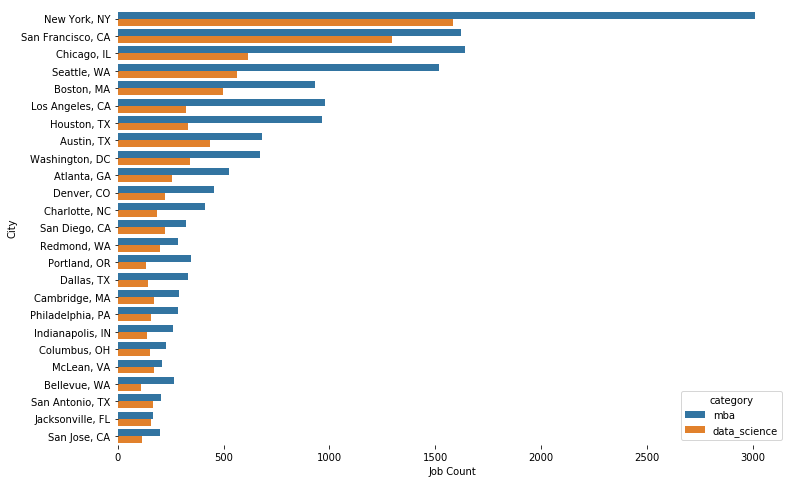

In [11]:
import seaborn as sns
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(y='Location', x='cat_count', hue="category", data=city_list_ratio, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)
ax1.set(xlabel='Job Count', ylabel='City');

#### Location Clusters

In [391]:
top_locations = pd.DataFrame(df_combined.groupby("Location").size().sort_values(ascending=False)[:100])
top_locations.reset_index(inplace=True)
top_locations.columns = ["Location","Count"]
top_locations['text'] = ""

for idx, row in top_locations.iterrows():
    top_locations['text'][idx]= df_combined_clean[df_combined_clean['Location']==\
                                           top_locations['Location'][idx]]['Snippet'].values

top_locations['text'] = top_locations['text'].astype(str)

/Users/Collier/miniconda3/envs/env1/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [392]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1,4),
                                          max_df=0.9,
                                          min_df=0.1,
                                          stop_words='english'))])
tfidf_dat = tfidf_transformer.fit_transform(top_locations['text'])

In [393]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,
               max_iter=1000,random_state=99)
    km.fit(tfidf_dat)
    distortions.append(km.inertia_)

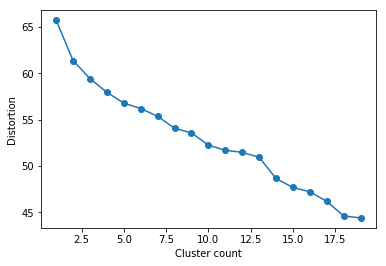

In [394]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(range(1,20),distortions,marker='o')
plt.xlabel('Cluster count')
plt.ylabel('Distortion')
plt.show;

In [395]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,
           max_iter=1000,random_state=99)
km.fit(tfidf_dat)
top_locations['cluster_num'] = km.labels_

In [396]:
df_cluster_one = top_locations[top_locations['cluster_num']==0]
df_cluster_two = top_locations[top_locations['cluster_num']==1]
df_cluster_three = top_locations[top_locations['cluster_num']==2]
# df_cluster_four = top_companies[top_companies['cluster_num']==3]
# df_cluster_five = top_companies[top_companies['cluster_num']==4]
# df_cluster_six = df_combined_clean[df_combined_clean['cluster_num']==5]

In [397]:
for i in range(3):
    cluster = top_locations[top_locations['cluster_num']==i]
    result = Counter(" ".join(cluster["text"].values.tolist()).split(" "))
    word_counts_cluster = pd.DataFrame.from_dict(result, orient='index').reset_index()
    word_counts_cluster.columns = ['word','count']
    word_counts_cluster.sort_values("count",ascending=False,inplace=True)
    word_counts_cluster.reset_index(inplace=True)
    k = i + 1
    print("Top Words in Cluster %d" % k)
    print(word_counts_cluster.head(10))
    print()

Top Words in Cluster 1
   index        word  count
0  3250   data        326  
1  4023   mn          297  
2  1807   degree      294  
3  2285   field       280  
4  1781   experience  276  
5  2693   develop     276  
6  4062   home        270  
7  3993   business    266  
8  2045   related     229  
9  917    tools       191  

Top Words in Cluster 2
   index         word  count
0  1968   degree       9656 
1  10182  experience   9343 
2  7669   field        9142 
3  19917  develop      9061 
4  11377  data         8714 
5  11925  business     8645 
6  755    technical    8268 
7  23722  engineering  8166 
8  10478  related      7996 
9  3008   design       7872 

Top Words in Cluster 3
   index         word  count
0  4007   degree       3110 
1  11244  engineering  3079 
2  685    technical    2923 
3  9577   experience   2908 
4  9844   related      2644 
5  5571   computer     2503 
6  10715  data         2352 
7  7229   field        2352 
8  7988   design       2074 
9  7512   de

In [400]:
cluster_colors = {0:"red",
                 1:"orange",
                 2:"green",
                 3:"blue",
                 4:"purple"}
#                  5:"purple"}

cluster_names = {0:"Finance/Accounting",
                 1:"Product Management",
                 2:"Data/Engineering",
                 3:"Data/Analyst",
                 4:"Marketing/Product Management"}
        
#                 5:"?"}

In [401]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_dat)

In [406]:
mds = MDS(n_components=2,dissimilarity="precomputed",random_state=99)
coords = mds.fit_transform(dist)
x,y = coords[:,0],coords[:,1]

mds_df = pd.DataFrame(dict(x=x,y=y,
               cluster=top_locations['cluster_num'],
              locations = top_locations['Location']))

clusters = mds_df.groupby('cluster')

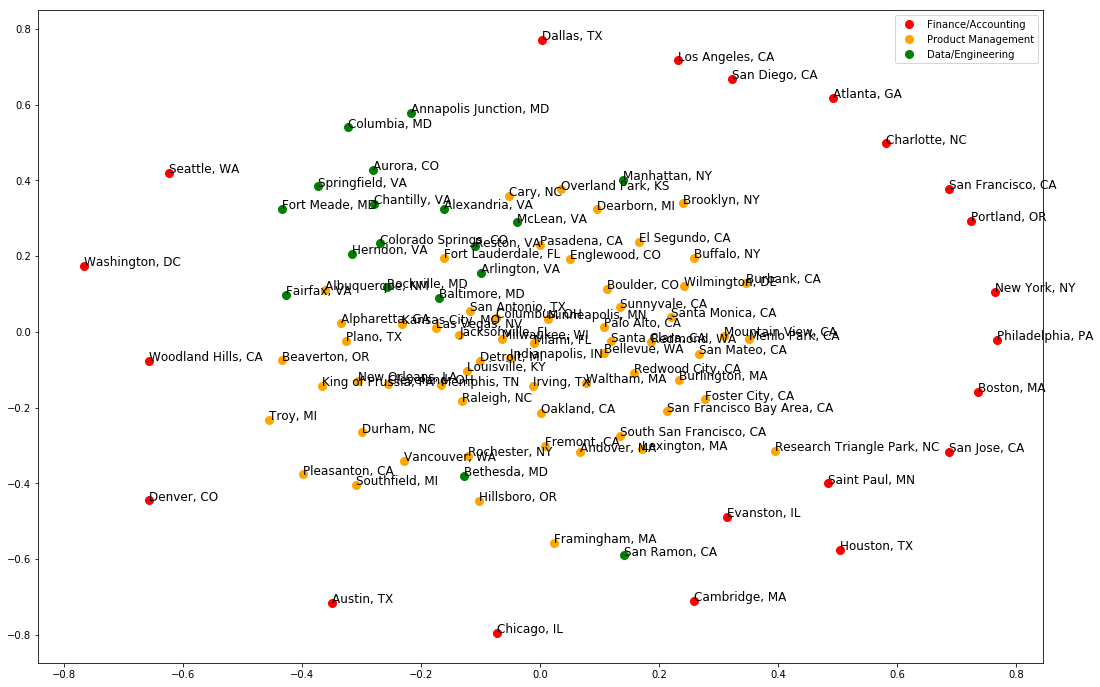

In [407]:
fig, ax = plt.subplots(figsize=(18, 12))

ax.margins(0.05)
for name, group in clusters:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
            label=cluster_names[name], color=cluster_colors[name])
    
ax.legend(numpoints=1)  
for idx, row in mds_df.iterrows():
    ax.text(row['x'],row['y'],
           row['locations'],size=12)
    
plt.show()

### Company Trends

#### Top Companies by City

##### Data Science

In [18]:
# group by city, company and create company ranks based on number of jobs
ds_top_company_by_city = pd.DataFrame(df_data_sci.groupby(['Location','Company']).size().reset_index())
ds_top_company_by_city.columns = ['Location','Company','Count']
ds_top_company_by_city.sort_values(['Location','Count'],ascending=False,inplace=True)
ds_top_company_by_city['company_rank'] = ds_top_company_by_city.groupby('Location')['Count'].rank(method='first',ascending=False).astype(int)
# group by city and create city ranks based on number of jobs
city_ranks = pd.DataFrame(df_data_sci.groupby('Location').size().rank(method='first',ascending=False).astype(int).reset_index())
city_ranks.columns = ['Location','city_rank']
ds_top_company_by_city = pd.merge(ds_top_company_by_city,city_ranks,how="inner",on="Location")
ds_top_company_by_city.sort_values(['city_rank','company_rank'],inplace=True)

In [19]:
ds_top_company_by_city.groupby('Location').head()[:50]

,Location,Company,Count,company_rank,city_rank
2309,"New York, NY",Averity,77,1,1
2310,"New York, NY",JP Morgan Chase,68,2,1
2311,"New York, NY",Integral Ad Science,53,3,1
2312,"New York, NY",Essence,24,4,1
2313,"New York, NY",KPMG,24,5,1
916,"San Francisco, CA",Uber,35,1,2
917,"San Francisco, CA",Salesforce,34,2,2
918,"San Francisco, CA",SigFig,30,3,2
919,"San Francisco, CA",CrowdFlower,29,4,2
920,"San Francisco, CA",Ancestry,25,5,2


##### MBA

In [20]:
# group by city, company and create company ranks based on number of jobs
mba_top_company_by_city = pd.DataFrame(df_mba.groupby(['Location','Company']).size().reset_index())
mba_top_company_by_city.columns = ['Location','Company','Count']
mba_top_company_by_city.sort_values(['Location','Count'],ascending=False,inplace=True)
mba_top_company_by_city['company_rank'] = mba_top_company_by_city.groupby('Location')['Count'].rank(method='first',ascending=False).astype(int)
# group by city and create city ranks based on number of jobs
city_ranks = pd.DataFrame(df_mba.groupby('Location').size().rank(method='first',ascending=False).astype(int).reset_index())
city_ranks.columns = ['Location','city_rank']
mba_top_company_by_city = pd.merge(mba_top_company_by_city,city_ranks,how="inner",on="Location")
mba_top_company_by_city.sort_values(['city_rank','company_rank'],inplace=True)

In [21]:
mba_top_company_by_city.groupby('Location').head()[:50]

,Location,Company,Count,company_rank,city_rank
4338,"New York, NY",JP Morgan Chase,93,1,1
4339,"New York, NY",Michael Page US,60,2,1
4340,"New York, NY",American Express,54,3,1
4341,"New York, NY",BNY Mellon,44,4,1
4342,"New York, NY",EY,43,5,1
10081,"Chicago, IL",University of Chicago,67,1,2
10082,"Chicago, IL",United Airlines Inc.,52,2,2
10083,"Chicago, IL",KPMG,28,3,2
10084,"Chicago, IL",BMO Financial Group,26,4,2
10085,"Chicago, IL",JP Morgan Chase,24,5,2


#### Top Companies by Category

Who are the top hiring companies for data scientists? For MBAs? It looks like Amazon and Microsoft lead in both categories.  The importance of data science in the financial sector is evident by the presence of several banks at the top of the data science list.

In [12]:
ds_job_comps = pd.DataFrame((df_data_sci
     .groupby('Company')
     .count()
     .sort_values('Location',ascending=False)['Location']
     .reset_index()))
mba_job_comps = pd.DataFrame((df_mba
     .groupby('Company')
     .count()
     .sort_values('Location',ascending=False)['Location']
     .reset_index()))
combined_comps = pd.concat([mba_job_comps, ds_job_comps], axis=1)
combined_comps.columns = ['MBA_Companies','Job_Counts',
                         'DS_Companies','Job_Counts']

In [13]:
combined_comps.head(20)

,MBA_Companies,Job_Counts,DS_Companies,Job_Counts
0,Amazon Corporate LLC,761,Amazon Corporate LLC,227.0
1,Microsoft,322,Microsoft,216.0
2,JP Morgan Chase,268,Booz Allen Hamilton,119.0
3,Emerson,255,JP Morgan Chase,113.0
4,Michael Page US,211,KPMG,104.0
5,Wells Fargo,182,Averity,83.0
6,Bank of America,169,Workbridge Associates,74.0
7,"Amazon Web Services, Inc.",159,Altamira Technologies Corporation,74.0
8,Google,145,Integral Ad Science,71.0
9,CBRE,142,Jobspring Partners,70.0


#### Top Company Category Ratios

Among our top hirers, Booz Allen Hamilton and KPMG have near even splits between MBA and Data Science positions.

In [14]:
company_list_ratio = pd.DataFrame(df_combined
                               .groupby(['Company','category'])
                               .size()).reset_index().sort_values(0,ascending=False)
company_list_totals = company_list_ratio.groupby("Company").agg({0:np.sum})
company_list_totals['Company'] = company_list_totals.index
company_list_ratio = company_list_ratio.merge(company_list_totals,how="inner",on="Company")
company_list_ratio.columns = ["Company","category","cat_count","tot_count"]
company_list_ratio['cat_pct'] = company_list_ratio['cat_count']/company_list_ratio['tot_count']
company_list_ratio = company_list_ratio.sort_values(['tot_count','Company','category'],ascending=False)
company_list_ratio = company_list_ratio.head(50)
company_list_ratio.head(20)

,Company,category,cat_count,tot_count,cat_pct
0,Amazon Corporate LLC,mba,761,988,0.770243
1,Amazon Corporate LLC,data_science,227,988,0.229757
2,Microsoft,mba,322,538,0.598513
3,Microsoft,data_science,216,538,0.401487
4,JP Morgan Chase,mba,268,381,0.703412
5,JP Morgan Chase,data_science,113,381,0.296588
6,Emerson,mba,255,258,0.988372
7,Emerson,data_science,3,258,0.011628
23,Booz Allen Hamilton,mba,101,220,0.459091
22,Booz Allen Hamilton,data_science,119,220,0.540909


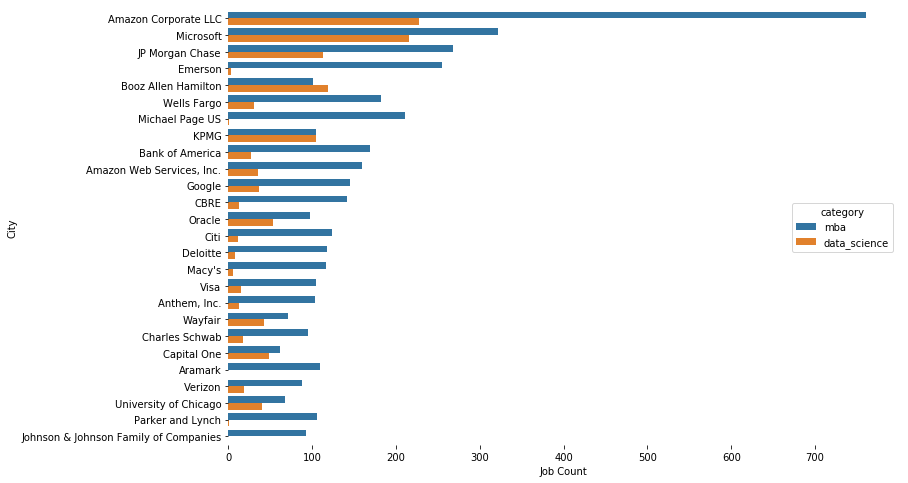

In [15]:
import seaborn as sns
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(y='Company', x='cat_count', hue="category", data=company_list_ratio, ax=ax1,linewidth=2.5);
sns.despine(left=True, bottom=True)
ax1.set(xlabel='Job Count', ylabel='City');

#### Company Clusters

In [371]:
top_companies = pd.DataFrame(df_combined.groupby("Company").size().sort_values(ascending=False)[:100])
top_companies.reset_index(inplace=True)
top_companies.columns = ["Company","Count"]
top_companies['text'] = ""

for idx, row in top_companies.iterrows():
    top_companies['text'][idx]= df_combined_clean[df_combined_clean['Company']==\
                                           top_companies['Company'][idx]]['Snippet'].values

top_companies['text'] = top_companies['text'].astype(str)

/Users/Collier/miniconda3/envs/env1/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [374]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1,4),
                                          max_df=0.9,
                                          min_df=0.1,
                                          stop_words='english'))])
tfidf_dat = tfidf_transformer.fit_transform(top_companies['text'])

In [375]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,
               max_iter=1000,random_state=99)
    km.fit(tfidf_dat)
    distortions.append(km.inertia_)

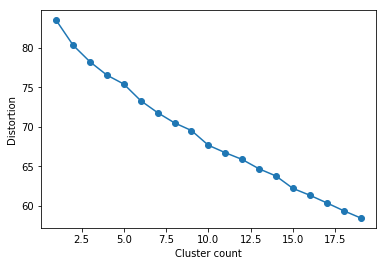

In [376]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(range(1,20),distortions,marker='o')
plt.xlabel('Cluster count')
plt.ylabel('Distortion')
plt.show;

In [381]:
km = KMeans(n_clusters=5,init='k-means++',n_init=10,
           max_iter=1000,random_state=99)
km.fit(tfidf_dat)
top_companies['cluster_num'] = km.labels_

In [382]:
df_cluster_one = top_companies[top_companies['cluster_num']==0]
df_cluster_two = top_companies[top_companies['cluster_num']==1]
df_cluster_three = top_companies[top_companies['cluster_num']==2]
df_cluster_four = top_companies[top_companies['cluster_num']==3]
df_cluster_five = top_companies[top_companies['cluster_num']==4]
# df_cluster_six = df_combined_clean[df_combined_clean['cluster_num']==5]

In [383]:
for i in range(5):
    cluster = top_companies[top_companies['cluster_num']==i]
    result = Counter(" ".join(cluster["text"].values.tolist()).split(" "))
    word_counts_cluster = pd.DataFrame.from_dict(result, orient='index').reset_index()
    word_counts_cluster.columns = ['word','count']
    word_counts_cluster.sort_values("count",ascending=False,inplace=True)
    word_counts_cluster.reset_index(inplace=True)
    k = i + 1
    print("Top Words in Cluster %d" % k)
    print(word_counts_cluster.head(10))
    print()

Top Words in Cluster 1
   index         word  count
0  1155   technical    2474 
1  8153   data         2418 
2  7946   develop      2309 
3  8976   business     2272 
4  9019   engineering  2224 
5  1982   experience   2200 
6  2559   field        2028 
7  3771   design       1967 
8  8998   computer     1736 
9  6545   degree       1650 

Top Words in Cluster 2
   index           word  count
0  563    degree         514  
1  3805   state          473  
2  2178   field          467  
3  1926   related        458  
4  2938   nursing        375  
5  1890   clinical       363  
6  2122   certification  339  
7  1528   experience     301  
8  1974   professional   288  
9  3848   mn             285  

Top Words in Cluster 3
   index         word  count
0  6757   engineering  2447 
1  4884   degree       1824 
2  853    technical    1594 
3  1505   experience   1594 
4  6735   computer     1265 
5  5074   related      1181 
6  2843   design       1153 
7  3203   years        1125 
8  1940 

In [384]:
cluster_colors = {0:"red",
                 1:"orange",
                 2:"green",
                 3:"blue",
                 4:"purple"}
#                  5:"purple"}

cluster_names = {0:"Finance/Accounting",
                 1:"Product Management",
                 2:"Data/Engineering",
                 3:"Data/Analyst",
                 4:"Marketing/Product Management"}
        
#                 5:"?"}

In [385]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_dat)

In [388]:
mds = MDS(n_components=2,dissimilarity="precomputed",random_state=99)
coords = mds.fit_transform(dist)
x,y = coords[:,0],coords[:,1]

mds_df = pd.DataFrame(dict(x=x,y=y,
               cluster=top_companies['cluster_num'],
              companies = top_companies['Company']))

clusters = mds_df.groupby('cluster')

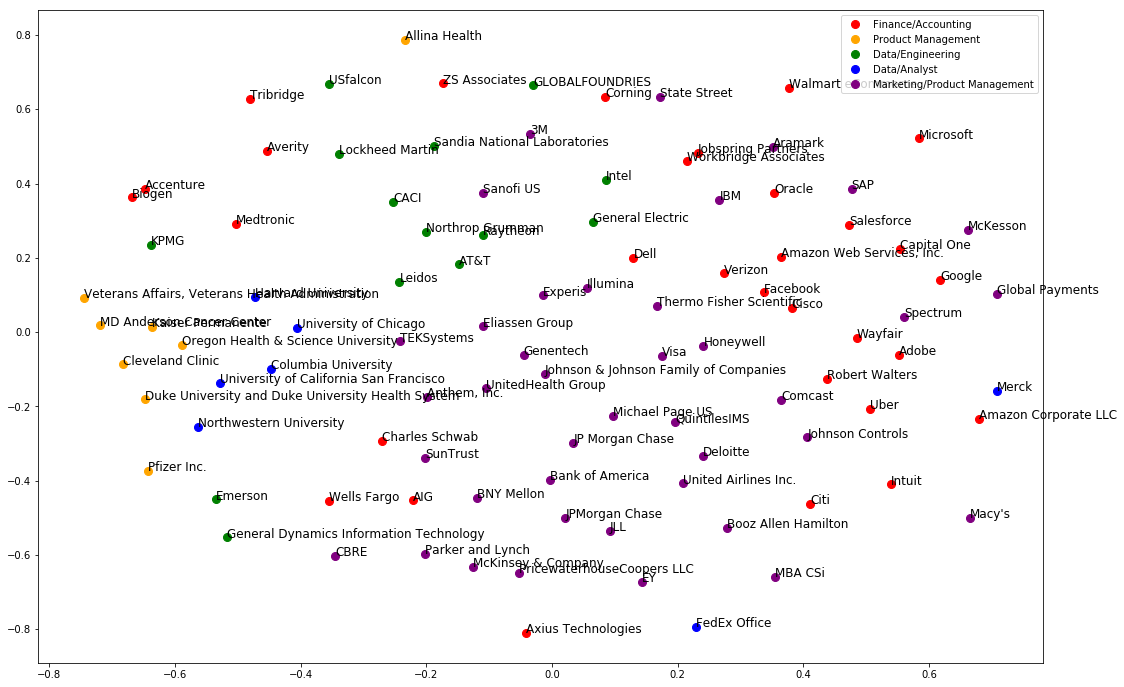

In [389]:
fig, ax = plt.subplots(figsize=(18, 12))

ax.margins(0.05)
for name, group in clusters:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
            label=cluster_names[name], color=cluster_colors[name])
    
ax.legend(numpoints=1)  
for idx, row in mds_df.iterrows():
    ax.text(row['x'],row['y'],
           row['companies'],size=12)
    
plt.show()

In [ ]:
mds = MDS(n_components=2,dissimilarity="precomputed",random_state=99)
coords = mds.fit_transform(dist)
x,y = coords[:,0],coords[:,1]

mds_df = pd.DataFrame(dict(x=x,y=y,
               cluster=top_companies['cluster_num'],
              companies = top_companies['Company']))

clusters = mds_df.groupby('cluster')

### Job Titles

Looking at the top job titles by job category, there seems to be less diversity for data science titles than mba titles.  We see that "product manager" is common across both categories.

In [16]:
ds_job_titles = pd.DataFrame((df_data_sci
     .groupby('Job_Title')
     .count()
     .sort_values('Company',ascending=False)['Company']
     .head(20).reset_index()))
mba_job_titles = pd.DataFrame((df_mba
     .groupby('Job_Title')
     .count()
     .sort_values('Company',ascending=False)['Company']
     .head(20).reset_index()))
combined_titles = pd.concat([mba_job_titles,ds_job_titles], axis=1)
combined_titles.columns = ['MBA_Titles','Job_Counts',
                         'DS_Titles','Job_Counts']

In [17]:
combined_titles

,MBA_Titles,Job_Counts,DS_Titles,Job_Counts
0,Senior Financial Analyst,220,Data Scientist,589
1,Financial Analyst,213,Senior Data Scientist,152
2,Product Manager,202,Data Engineer,116
3,Controller,178,Software Engineer,108
4,Finance Manager,131,Data Analyst,107
5,Project Manager,116,Senior Software Engineer,88
6,Senior Accountant,116,Product Manager,47
7,Product Marketing Manager,102,Senior Data Engineer,43
8,Senior Product Manager,85,Sr. Data Scientist,41
9,Chief Financial Officer,84,Retail Customer Service Associate,41


#### Top Titles by City

##### Data Science

In [22]:
# group by city, company and create company ranks based on number of jobs
ds_top_title_by_city = pd.DataFrame(df_data_sci.groupby(['Location','Job_Title']).size().reset_index())
ds_top_title_by_city.columns = ['Location','Title','Count']
ds_top_title_by_city.sort_values(['Location','Count'],ascending=False,inplace=True)
ds_top_title_by_city['title_rank'] = ds_top_title_by_city.groupby('Location')['Count'].rank(method='first',ascending=False).astype(int)
# group by city and create city ranks based on number of jobs
city_ranks = pd.DataFrame(df_data_sci.groupby('Location').size().rank(method='first',ascending=False).astype(int).reset_index())
city_ranks.columns = ['Location','city_rank']
ds_top_title_by_city = pd.merge(ds_top_title_by_city,city_ranks,how="inner",on="Location")
ds_top_title_by_city.sort_values(['city_rank','title_rank'],inplace=True)

In [23]:
ds_top_title_by_city.groupby('Location').head()[:50]

,Location,Title,Count,title_rank,city_rank
4111,"New York, NY",Data Scientist,97,1,1
4112,"New York, NY",Senior Data Scientist,30,2,1
4113,"New York, NY",Data Engineer,15,3,1
4114,"New York, NY",Data Analyst,12,4,1
4115,"New York, NY",Product Manager,12,5,1
1677,"San Francisco, CA",Data Scientist,65,1,2
1678,"San Francisco, CA",Data Engineer,22,2,2
1679,"San Francisco, CA",Data Analyst,21,3,2
1680,"San Francisco, CA",Senior Data Scientist,18,4,2
1681,"San Francisco, CA",Backend Engineer (MS1),15,5,2


##### MBA

In [24]:
# group by city, company and create company ranks based on number of jobs
mba_top_title_by_city = pd.DataFrame(df_mba.groupby(['Location','Job_Title']).size().reset_index())
mba_top_title_by_city.columns = ['Location','Title','Count']
mba_top_title_by_city.sort_values(['Location','Count'],ascending=False,inplace=True)
mba_top_title_by_city['title_rank'] = mba_top_title_by_city.groupby('Location')['Count'].rank(method='first',ascending=False).astype(int)
# group by city and create city ranks based on number of jobs
city_ranks = pd.DataFrame(df_mba.groupby('Location').size().rank(method='first',ascending=False).astype(int).reset_index())
city_ranks.columns = ['Location','city_rank']
mba_top_title_by_city = pd.merge(mba_top_title_by_city,city_ranks,how="inner",on="Location")
mba_top_title_by_city.sort_values(['city_rank','title_rank'],inplace=True)

In [25]:
mba_top_title_by_city.groupby('Location').head()[:50]

,Location,Title,Count,title_rank,city_rank
8244,"New York, NY",Senior Financial Analyst,18,1,1
8245,"New York, NY",Financial Analyst,13,2,1
8246,"New York, NY",Product Manager,12,3,1
8247,"New York, NY",Project Manager,12,4,1
8248,"New York, NY",Chief Financial Officer,9,5,1
18413,"Chicago, IL",Senior Accountant,10,1,2
18414,"Chicago, IL",Senior Financial Analyst,10,2,2
18415,"Chicago, IL",Engagement Manager,8,3,2
18416,"Chicago, IL",Brand Manager,7,4,2
18417,"Chicago, IL",Product Manager,7,5,2


#### Top Titles by Company

##### Data Science

In [26]:
# group by city, company and create company ranks based on number of jobs
ds_top_title_by_company = pd.DataFrame(df_data_sci.groupby(['Company','Job_Title']).size().reset_index())
ds_top_title_by_company.columns = ['Company','Title','Count']
ds_top_title_by_company.sort_values(['Company','Count'],ascending=False,inplace=True)
ds_top_title_by_company['title_rank'] = ds_top_title_by_company.groupby('Company')['Count'].rank(method='first',ascending=False).astype(int)
# group by city and create city ranks based on number of jobs
city_ranks = pd.DataFrame(df_data_sci.groupby('Company').size().rank(method='first',ascending=False).astype(int).reset_index())
city_ranks.columns = ['Company','company_rank']
ds_top_title_by_company = pd.merge(ds_top_title_by_company,city_ranks,how="inner",on="Company")
ds_top_title_by_company.sort_values(['company_rank','title_rank'],inplace=True)

In [27]:
ds_top_title_by_company.groupby('Company').head()[:50]

,Company,Title,Count,title_rank,company_rank
11851,Amazon Corporate LLC,Software Development Engineer,23,1,1
11852,Amazon Corporate LLC,Business Intelligence Engineer,6,2,1
11853,Amazon Corporate LLC,"Manager, Data Science",5,3,1
11854,Amazon Corporate LLC,Software Development Manager,5,4,1
11855,Amazon Corporate LLC,Sr. Product Manager,4,5,1
5539,Microsoft,Senior Software Engineer,15,1,2
5540,Microsoft,Software Engineer II,15,2,2
5541,Microsoft,Software Engineer,12,3,2
5542,Microsoft,Senior Program Manager,9,4,2
5543,Microsoft,Principal Software Engineer,7,5,2


##### MBA

In [28]:
# group by city, company and create company ranks based on number of jobs
mba_top_title_by_company = pd.DataFrame(df_mba.groupby(['Company','Job_Title']).size().reset_index())
mba_top_title_by_company.columns = ['Company','Title','Count']
mba_top_title_by_company.sort_values(['Company','Count'],ascending=False,inplace=True)
mba_top_title_by_company['title_rank'] = mba_top_title_by_company.groupby('Company')['Count'].rank(method='first',ascending=False).astype(int)
# group by city and create city ranks based on number of jobs
city_ranks = pd.DataFrame(df_mba.groupby('Company').size().rank(method='first',ascending=False).astype(int).reset_index())
city_ranks.columns = ['Company','company_rank']
mba_top_title_by_company = pd.merge(mba_top_title_by_company,city_ranks,how="inner",on="Company")
mba_top_title_by_company.sort_values(['company_rank','title_rank'],inplace=True)

In [29]:
mba_top_title_by_company.groupby('Company').head()[:50]

,Company,Title,Count,title_rank,company_rank
22766,Amazon Corporate LLC,Sr. Product Manager,15,1,1
22767,Amazon Corporate LLC,Senior Financial Analyst,11,2,1
22768,Amazon Corporate LLC,Finance Manager,9,3,1
22769,Amazon Corporate LLC,Senior Product Manager,8,4,1
22770,Amazon Corporate LLC,Sr. Program Manager,7,5,1
9627,Microsoft,Principal Program Manager,11,1,2
9628,Microsoft,Ent Channel Mgr,9,2,2
9629,Microsoft,Senior Product Marketing Manager,7,3,2
9630,Microsoft,Business Program Manager,6,4,2
9631,Microsoft,Senior Program Manager,6,5,2


#### Job-Titles Clusters

In [104]:
top_titles = pd.DataFrame(df_combined.groupby("Job_Title").size().sort_values(ascending=False)[:100])
top_titles.reset_index(inplace=True)
top_titles.columns = ["Job_Title","Count"]
top_titles['text'] = ""

for idx, row in top_titles.iterrows():
    top_titles['text'][idx]= df_combined_clean[df_combined_clean['Job_Title']==\
                                           top_titles['Job_Title'][idx]]['Snippet'].values

top_titles['text'] = top_titles['text'].astype(str)

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1,4),
                                          max_df=0.9,
                                          min_df=0.1,
                                          stop_words='english'))])
tfidf_dat = tfidf_transformer.fit_transform(top_titles['text'])

In [247]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,
               max_iter=1000,random_state=99)
    km.fit(tfidf_dat)
    distortions.append(km.inertia_)

**Distortion**
Below we plot the distortions for each number of clusters.  The common method for determining the number of clusters is to select the number where the 'elbow' forms.  In the below plot we can see an elbow forming around the 4-5 mark.  We will go with 5 clusters.

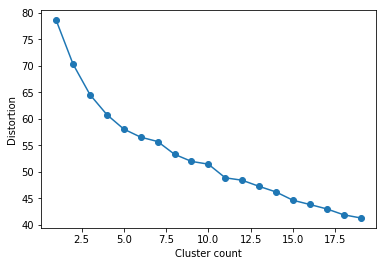

In [297]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(range(1,20),distortions,marker='o')
plt.xlabel('Cluster count')
plt.ylabel('Distortion')
plt.show;

In [259]:
km = KMeans(n_clusters=5,init='k-means++',n_init=10,
           max_iter=1000,random_state=99)
km.fit(tfidf_dat)
top_titles['cluster_num'] = km.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=99, tol=0.0001, verbose=0)

In [261]:
df_cluster_one = top_titles[top_titles['cluster_num']==0]
df_cluster_two = top_titles[top_titles['cluster_num']==1]
df_cluster_three = top_titles[top_titles['cluster_num']==2]
df_cluster_four = top_titles[top_titles['cluster_num']==3]
df_cluster_five = top_titles[top_titles['cluster_num']==4]
# df_cluster_six = df_combined_clean[df_combined_clean['cluster_num']==5]

In [262]:
for i in range(5):
    cluster = top_titles[top_titles['cluster_num']==i]
    result = Counter(" ".join(cluster["text"].values.tolist()).split(" "))
    word_counts_cluster = pd.DataFrame.from_dict(result, orient='index').reset_index()
    word_counts_cluster.columns = ['word','count']
    word_counts_cluster.sort_values("count",ascending=False,inplace=True)
    word_counts_cluster.reset_index(inplace=True)
    k = i + 1
    print("Top Words in Cluster %d" % k)
    print(word_counts_cluster.head(10))
    print()

Top Words in Cluster 1
   index        word  count
0  1282   financial   2003 
1  833    analysis    1579 
2  4577   accounting  1295 
3  5812   business    907  
4  437    finance     879  
5  1884   develop     723  
6  4883   reporting   720  
7  4169   degree      644  
8  4123   management  619  
9  4059   experience  571  

Top Words in Cluster 2
   index        word  count
0  2695   management  913  
1  2591   project     727  
2  4650   business    612  
3  1633   quality     587  
4  2559   driven      479  
5  56     regular     467  
6  230    attendance  464  
7  1175   technical   460  
8  3160   develop     437  
9  2051   experience  435  

Top Words in Cluster 3
   index         word  count
0  6642   data         2034 
1  7041   computer     1882 
2  3049   design       1752 
3  7339   engineering  1589 
4  5175   experience   1408 
5  4829   software     1383 
6  945    technical    1351 
7  5322   degree       1295 
8  5539   related      1103 
9  2086   field        

In [281]:
cluster_colors = {0:"red",
                 1:"orange",
                 2:"green",
                 3:"blue",
                 4:"purple"}
#                  5:"purple"}

cluster_names = {0:"Finance/Accounting",
                 1:"Product Management",
                 2:"Data/Engineering",
                 3:"Data/Analyst",
                 4:"Marketing/Product Management"}
        
#                 5:"?"}

In [282]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_dat)

In [283]:
mds = MDS(n_components=2,dissimilarity="precomputed",random_state=99)
coords = mds.fit_transform(dist)
x,y = coords[:,0],coords[:,1]

mds_df = pd.DataFrame(dict(x=x,y=y,
               cluster=top_titles['cluster_num'],
              job_titles = top_titles['Job_Title']))

clusters = mds_df.groupby('cluster')

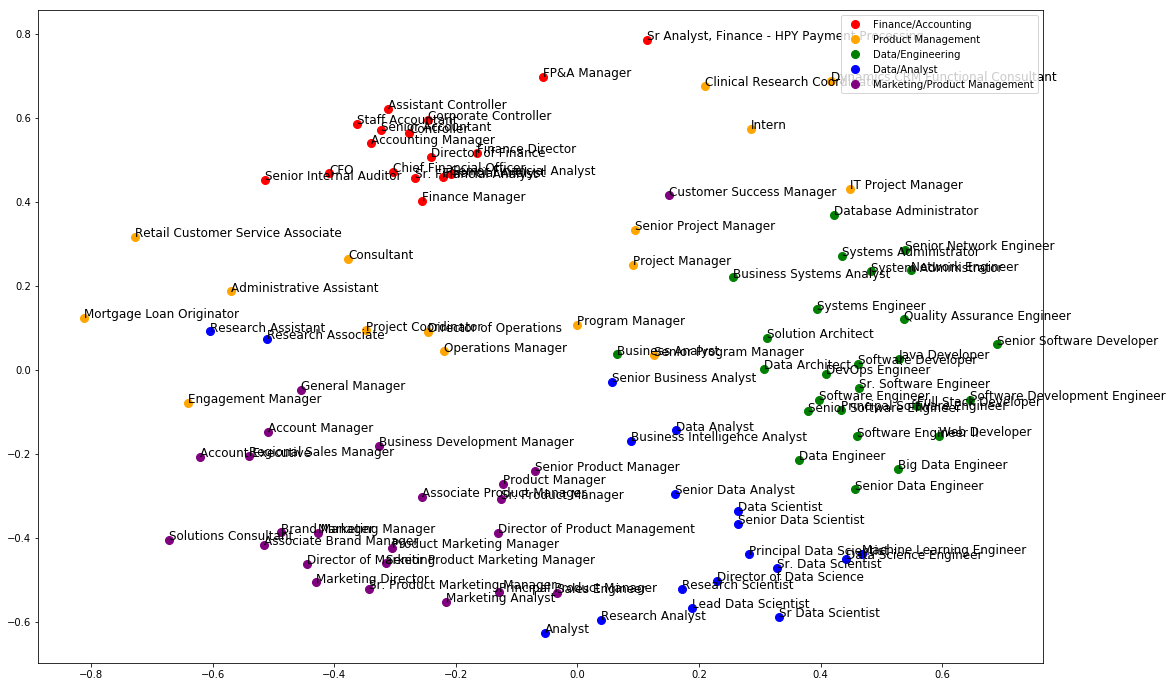

In [296]:
fig, ax = plt.subplots(figsize=(18, 12))

ax.margins(0.05)
for name, group in clusters:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
            label=cluster_names[name], color=cluster_colors[name])
    
ax.legend(numpoints=1)  
for idx, row in mds_df.iterrows():
    ax.text(row['x'],row['y'],
           row['job_titles'],size=12)
    
plt.show()

# Pre-modeling steps

To train our final model:
* Begin by training individual models, fitted and tuned on the training set
* Combine individual models into an ensemble model, fitted and tuned on the validation set
* Evaluate final model performance on test set.

Before we can train our classification models, several steps need to be taken. The first of which is splitting our dataset into training & test sets.  This is needed in order to determine that our model is not overfitting and classification performance can generalize to new data.

### Split into Training, Validation & Test sets

Lets combine our two datasets. We will also make 'mba' the positive class.

In [19]:
# split into training & test sets
df_combined = df_mba_clean.append(df_data_sci_clean)
df_combined.drop_duplicates(subset='Job_Key',keep='last')
df_combined.reset_index(inplace=True)
df_combined['category'] = np.where(df_combined['category']=="mba",1,0)

In [20]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df_combined['Snippet'],df_combined['category'],test_size=0.2,train_size=0.8,random_state=1)
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75,random_state=1)

In [21]:
len(X_train)

31315

In [22]:
len(y_train)

31315

In [23]:
len(y_cv)

10439

In [24]:
len(y_test)

10439

In [17]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df_combined['Snippet'],
#                     df_combined['category'],
#                     test_size=0.2,random_state=1)

In [16]:
#for later anlaysis (patterns)
# X_train_locations = df_combined.loc[X_train.index,"Location"]
# Y_train_locations = df_combined.loc[y_train.index,"Location"]
# X_train_companies = df_combined.loc[X_train.index,"Company"]
# Y_train_companies = df_combined.loc[y_train.index,"Company"]
# X_train_titles = df_combined.loc[X_train.index,"Job_Title"]
# Y_train_titles = df_combined.loc[y_train.index,"Job_Title"]
# X_train_category = df_combined.loc[X_train.index,"category"]
# Y_train_category = df_combined.loc[y_train.index,"category"]

# Model Techniques & Evaluation Metrics

We will also be following a somewhat uniform series of steps for executing the modeling phase, these techniques are used in order to maximize the performance of our specific models.  While the various tuning parameters might vary from one model to the next, the below practices are widely applicable to most of the models we will train in the following sections.

### K-fold Cross-Validation

With k-fold cross validation, the training dataset is randomly split into k folds without replacement.  K-1 folds are used for training the model while the kth fold is used for model testing.  This process is then repeated k times. 

K-fold cross validation is typically used for model tuning, or finding the optimal hyperparameter values that yield good model performance.  Once this process is completed, we can then use those optimal hyperparameter values to train our model on the test set.

### Grid Search

A useful, brute force, technique in optimizing hyperparameters is called grid search.  Grid search iterates though all specified combinations of hyperparameters for a given estimator or alogorithm, trains subsequent models on each and records the model's performance as given by a specified score, such as AUC (area under the curve) for classification problems or MSE (mean squared error) for prediction problems. 

To choose hyperparameter values, as well as evaluate the quality of our models, we will look mainly at AUC.

### Performance Metrics

#### Confusion Matrices

A sample confusion matrix looks like this:

Rows in the confusion matrix represent 'actual' classes, while columns represent 'predicted' classes.  From a confusion matrix, we can derive the following performance metrics, which will inform us as to the specific strengths and shortcomings of our models.

We will define a function to create confusion matrices for our models as follows:

In [ ]:
def confusion_matrix(y_train,y_pred):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    confmat = confusion_matrix(y_true=y_train, y_pred=y_pred)
    fix, ax = plt.subplots(figsize=(6,8))
    ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j,y=i,s=confmat[i,j],
                   va='center',ha='center',size=20)
    plt.xlabel('Predicted MBA')
    plt.ylabel('Actual MBA')
    plt.show()

#### Error and Accuracy

The prediction or classification error and accuracy give an overall picture of how many cases are misclassified by a given model.
* Error is the sum of all false predictions divided by the sum of total predictions

\begin{equation*}
Error = \frac{FP+FN}{FP+FN+TP+TN}
\end{equation*}

* Accuracy is the sum of all true predictions divided by the sum of total predictions

\begin{equation*}
Accuracy = \frac{TP+TN}{FP+FN+TP+TN}
\end{equation*}

#### True Positive Rate (TPR) and False Positive Rate (FPR)

These metrics are important for machine learning problems with imbalanced category proportions, such as this one where there are more MBA job listings than data science listings.

FPR is the ratio of negative samples that are incorrectly classified as positive or (1-TNR) where TNR (aka Specificity) is the ratio of negative samples that are incorrectly classified as negative.  

\begin{equation*}
FPR = \frac{FP}{N} + \frac{FP}{FP+TN}
\end{equation*}

\begin{equation*}
FPR = \frac{TP}{P} + \frac{TP}{FN+TP}
\end{equation*}

#### Precision and Recall

These metrics are related to TPR and FPR.  The accuracy of the positive predictions is called 'Precision'. 'Recall', also called 'sensitivity' or the 'true positive rate' is the ratio of positive instances that are correctly detected by the classifier.

\begin{equation*}
Precision = \frac{TP}{TP+FP}
\end{equation*}

\begin{equation*}
Recall = TPR = \frac{TP}{FN+TP}
\end{equation*}

As a rule, a 'precision/recall tradeoff' exists, whereby increasing precision reduces recall and vice versa. This precision/recall curve can be visualized.  We will define a function to generate such plots below:

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(lr_clf,X_train,y_train,method='decision_function',n_jobs=1)
from sklearn.metrics import precision_recall_curve
y_train_bin = y_train
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

### F1 Score

F1 score is a combination of precision and recall and favors classes with similar precision and recall measures.  

\begin{equation*}
F1 = 2 * \frac{Precision * Recall}{Precision + Recall}
\end{equation*}

### ROC Curve

The Receiver Operating Characeristic (ROC) curve is a useful tool for binary classification evaluation.

The ROC curve plots the true positive rate against the false positive rate or sensitivity (recall) versus 1-specificity.

The ideal ROC Curve has a true positive rate of 1 and a false positive rate of 0 or an AUC of 1. Therefore, the area under the curve **(AUC)** characterizes the performance of the model. A sample ROC Curve looks like this.

Lets define another function to generate ROC Curves.

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict
# y_scores = cross_val_predict(lr_clf,X_train,y_train,cv=5)
# y_scores = cross_val_predict(lr_clf,X_train,y_train,cv=5,method='decision_function')

fpr,tpr,thresholds = roc_curve(y_train_bin,y_scores,pos_label=1)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

# Training Classifiers

We are ready to begin training and tuning our classification models.  As a reminder, our goal is to correctly classify as many job postings under their actual category (Data Science vs MBA).

We will train and tune the following types of classifiers:
 * Logistic Regression Classifier
 * K Nearest Neighbors Classifier
 * Naive Bayes Classifier
 * Support Vector Machine Classifier
 * Stochastic Gradient Descent Classifier
 * Random Forest Classifier

## Logistic Regression

**Logistic Regression** is a popular, easily implentable linear model classification technique that works with linearly separable data.  Logistic Regression is a probabalistic model that uses a concept called an **odds ratio**.  This ratio is the odds in favor of an instance belong to a particular class.  Logistic regression takes the logarithm of the odds ratio to create the so-called **logit function** and then takes the inverse of the logit function to produce the **logistic function**.  This function produces an output between 0 and 1 which can be interpreted as the probability of a particular observation or sample belonging to the predicted class.  The probability threshold for determining which class is typically 50%, but this can be adjusted depending on the requirements of the problem.

**Regularization**

Regularization is the process of adding a penalty term to the cost function in order to yield smaller coefficient weights, in this way regularization introduces bias to the model.  When employing regularization, the goal is to find the combination of coefficient weights that optimize the cost function of our model while simeltaneously allowing the model to generalize well on new data (bias-variance tradeoff).  More generally, regularization is a tool we use to strike a balance between overfitting (high variance) and underfitting (high vias). In additional, regularization can also help combat multicolinearity among model features and filter out noise from data. With logistic regression, the cost function we are trying to **maximize** through regularization is called the **log-likelihood**.

**Hyperparameters explored:**
    * Regularization penalty types:
        * L1 - Yields sparse feature vectors where most feature weights become zero.
        * L2 - Penalizes large individual coefficient weights, shrinking them towards zero.
    * Inverse of Regularization Strength (C):
        * Decreased values of the inverse regularization parameter yields increased regularization strength.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [26]:
lr_clf = Pipeline([
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(class_weight="balanced",
                                           n_jobs=-1,
                                           random_state=1,
                                           max_iter=1000,
                                          C=1,
                                          penalty='l2'))
])                   

# parameters = {'clf__penalty':['l1','l2'],
#               'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# lr_clf = GridSearchCV(lr_clf, param_grid=parameters, scoring='roc_auc',n_jobs=-1,cv=10,verbose=True)

# lr_clf.best_params_
# {'clf__C': 1, 'clf__penalty': 'l2'}

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_train)

In [27]:
print('Train Accuracy: %.3f' % lr_clf.score(X_train, y_train))

Train Accuracy: 0.900


In [28]:
np.mean(y_train==y_pred)

0.8998243653201341

#### Performance Metrics

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_pred))

             precision    recall  f1-score   support

          0       0.86      0.89      0.88     12570
          1       0.93      0.90      0.92     18745

avg / total       0.90      0.90      0.90     31315



#### Confusion Matrix

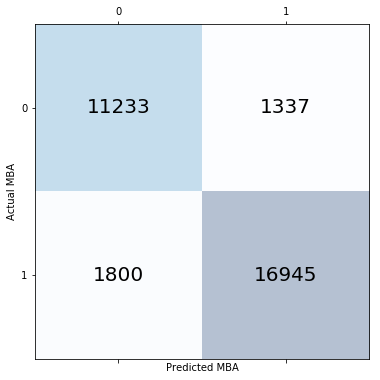

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred)
fix, ax = plt.subplots(figsize=(6,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
               va='center',ha='center',size=20)
plt.xlabel('Predicted MBA')
plt.ylabel('Actual MBA')
plt.show()

#### Precision/Recall Curve

In [31]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(lr_clf,X_train,y_train,method='decision_function',n_jobs=1)
from sklearn.metrics import precision_recall_curve
y_train_bin = y_train
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores)

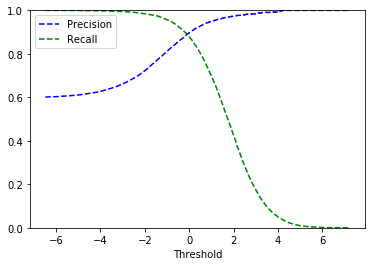

In [32]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

#### ROC Curve

In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict
# y_scores = cross_val_predict(lr_clf,X_train,y_train,cv=5)
# y_scores = cross_val_predict(lr_clf,X_train,y_train,cv=5,method='decision_function')

In [34]:
# y_train_bin = np.where(y_train=="mba",1,0)
# y_scores_bin = np.where(y_scores=="mba",1,0)
fpr,tpr,thresholds = roc_curve(y_train_bin,y_scores,pos_label=1)

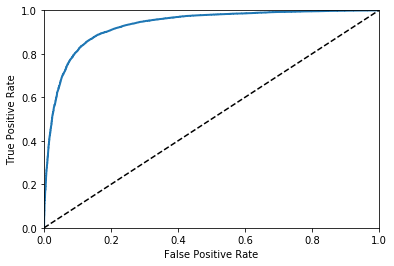

In [35]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

In [36]:
roc_auc_score(y_train_bin,y_scores)

0.93179866792375066

## K Nearest Neighbors

**K Nearest Neighbors (KNN)** is a non-parametric algorithm. KNN has been called a **lazy** learning algorithm due to the fact that it does not learn a discriminative function from the training data, but instead memorizes the data. These non-parametric algorithms cannot be characterized by a fixed set of parameters like logistic regression, but instead are characterized as the dataset grows in size.  An example of another non-parametric algorithm is random forests, which we will explore later. KNN belongs to a subset of non-parametric algorithms called **instance-based learners**.  

The biggest advantage of non-parametric, memory-based approaches, is the classifier's ability to adapt well to new training data.  

However, with non-parametric algorithms, computational complexity grows linearly with the size of the training data, leading to computationally expensive models.  It is also worth noting that KNN is susceptable to underforming in high-dimensionality datasets.

KNN runs based on the following steps:
    * Given a pre-selected number of K neighbors and specified distance metric:
        * Find the k nearest neighbors of the sample for classification
        * Assign the class label via majority vote.

**Hyperparameters explored:**
    * Number of k nearest neighbors (n_neighbors):
        * Choosing the right value for k is needed to balance overfitting and underfitting.
    * Weights (weights):
        * 

In [67]:
#GRID SEARCH WIP

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# parameters = {'clf__weights':['uniform','distance'],
#               'clf__n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


# knn_clf = GridSearchCV(knn_clf, param_grid=parameters, scoring='roc_auc',n_jobs=1,cv=10,verbose=10)

# knn_clf.best_params_
# {'clf__n_neighbors': 30, 'clf__weights': 'distance'}


knn_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', KNeighborsClassifier(n_neighbors=30,
                                                  weights='distance'))
])

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='distance'))])

In [44]:
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_train)

In [46]:
print('Train Accuracy: %.3f' % knn_clf.score(X_train, y_train))

Train Accuracy: 0.991


#### Performance Metrics

We can see by the breakdown of class predictions, that the model has a harder time with the data science class, only correctly classifying 74% of predicted data science jobs.

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

data_science       0.80      0.78      0.79      2953
         mba       0.89      0.90      0.90      5800

 avg / total       0.86      0.86      0.86      8753



#### Confusion Matrix

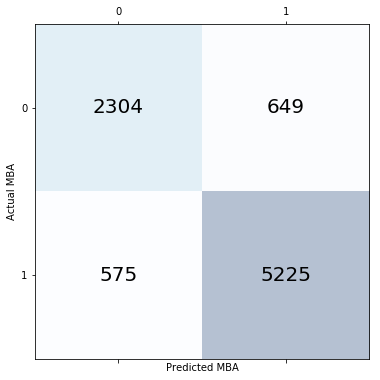

In [60]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fix, ax = plt.subplots(figsize=(6,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
               va='center',ha='center',size=20)
plt.xlabel('Predicted MBA')
plt.ylabel('Actual MBA')
plt.show()

#### Precision/Recall Curve

In [61]:
y_probas_knn = cross_val_predict(knn_clf,X_train,y_train,cv=5,method='predict_proba')
y_scores_knn = y_probas_knn[:,1]
from sklearn.metrics import precision_recall_curve
y_train_bin = np.where(y_train=="mba",1,0)
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores_knn)

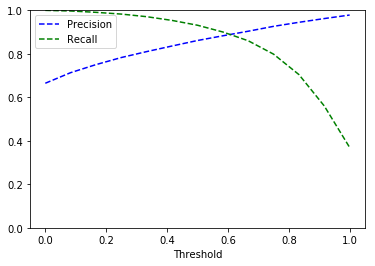

In [62]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

#### ROC Curve

In [63]:
from sklearn.metrics import roc_curve, auc

In [64]:
fpr,tpr,thresholds = roc_curve(y_train_bin,y_scores_knn,pos_label=1)

In [65]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

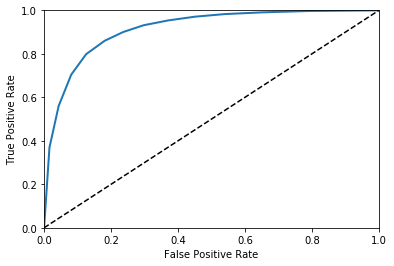

In [66]:
plot_roc_curve(fpr,tpr)
plt.show()

In [67]:
roc_auc_score(y_train_bin,y_scores_knn)

0.91420927120608586

## Naive Bayes

Naive Bayes is a probalistic classifier.  It assumes "naively" assumed independence among the features and relies on ...

Naive Bayes assume that the value of a given feature is independent of the value of any other feature.

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

**Hyperparameters explored:**
    * Alpha (alpha):
        

In [68]:
import sklearn         #added this line
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [167]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
nb_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())
])

parameters = {'clf__alpha': [0.0001,0.001, 0.01, 0.1,1]}

nb_clf = GridSearchCV(nb_clf, param_grid=parameters, scoring='roc_auc',n_jobs=-1,cv=10,verbose=True)

In [171]:
nb_clf.fit(X_train, y_train)
print('Train Accuracy: %.3f' % nb_clf.score(X_train, y_train))
y_pred = nb_clf.predict(X_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.9s finished


Train Accuracy: 0.954


In [174]:
nb_clf.best_params_

{'clf__alpha': 0.1}

In [ ]:
#nb_clf.best_params_
#{'clf__alpha': 0.1}

In [172]:
nb_clf.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

#### Performance Metrics

In [173]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.83      0.86     12082
          1       0.89      0.93      0.91     18581

avg / total       0.89      0.89      0.89     30663



#### Confusion Matrix

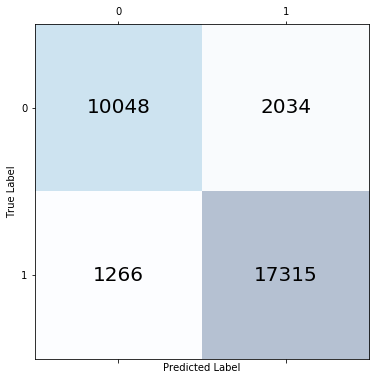

In [94]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred)
fix, ax = plt.subplots(figsize=(6,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
               va='center',ha='center',size=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Precision/Recall Curve

In [95]:
y_probas_nb = cross_val_predict(nb_clf,X_train,y_train,cv=10,method='predict_proba')
# y_probas_forest = cross_val_predict(forest_clf,X_train,y_train,cv=5,method="predict_proba")
y_scores_nb = y_probas_nb[:,1]
from sklearn.metrics import precision_recall_curve
# y_train_bin = np.where(y_train=="mba",1,0)
# precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.9s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.1s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.0s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.6s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.6s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.6s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.5s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.8s finished


In [96]:
y_train_bin = y_train
# y_train_bin = np.where(y_train=="mba",1,0)

In [97]:
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores_nb)

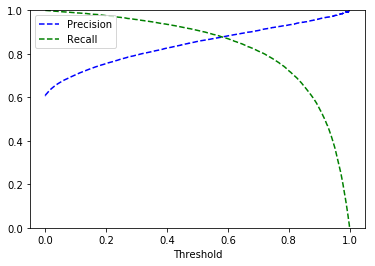

In [98]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

#### ROC Curve

In [99]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict
# y_scores = cross_val_predict(lr_clf,X_train,y_train,cv=5)
# y_scores = cross_val_predict(nb_clf,X_train,y_train,cv=5,method='decision_function')

In [100]:
# y_train_bin = np.where(y_train=="mba",1,0)
# y_scores_bin = np.where(y_scores=="mba",1,0)
fpr,tpr,thresholds = roc_curve(y_train_bin,y_scores_nb,pos_label=1)

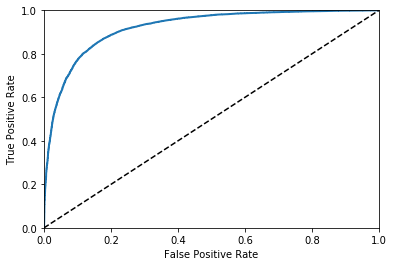

In [101]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

In [102]:
roc_auc_score(y_train_bin,y_scores_nb)

0.92091068075165561

## Support Vector Machine

**Support Vector Machine (SVM)** is an algorithm which can perform both linear and nonlinear classification. SVM seeks to find the widest possible margin or distance between the decision boundary of the distinct classes and the training samples themselves.  The balancing act in SVM is to keep the gulf between the classes as large as possible while simeltaneously limiting the number of samples that end up in the gulf.  This process is called **soft margin classification**. Decision boundaries with large margins tend to generalize better while those with small margins are more prone to overfitting.

Trained SVMs produce **support vectors** which can be thought of as an instance which is located within the gulf mentioned above.  These support vectors influence the decision boundary.  Additionally, model predictions are made using only these support vectors and not the entire training set.

#### Cost Penalization

Similar to how we implemented regularization with logistic regression, we can control the level of cost penalization with SVM, which in turn controls the width of the margin gulf.  This has the same effect of controlling the bias-variance tradeoff.



Use kernels on non-linear datasets.



**Hyperparameters explored:**
    * Pemalty for Misclassification (C):
        * A smaller C value leads to a wider gulf but more margin violations.  
        * A higher C value leads to a more narrow gulf with fewer margin volations.
    * Kernel:
        * rbf:
        * linear: The classes are linearly separable.  
        * poly: 

In [104]:
from sklearn.model_selection import GridSearchCV
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [105]:
svm_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(probability=True,class_weight="balanced")),
])

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'clf__kernel': ["rbf","linear","poly"]}

svm_clf = GridSearchCV(svm_clf, param_grid=parameters, scoring='roc_auc',n_jobs=-1,cv=10,verbose=True)

svm_clf.fit(X_train, y_train)
print('Test Accuracy: %.3f' % svm_clf.score(X_train, y_train))
y_pred = svm_clf.predict(X_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 136.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 737.3min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 900.6min finished


Test Accuracy: 0.965


In [106]:
svm_clf.best_params_

{'clf__C': 1, 'clf__kernel': 'linear'}

In [ ]:
#svm_clf.best_params_
#{'clf__C': 1, 'clf__kernel': 'linear'}

In [107]:
svm_clf.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

#### Performance Metrics

In [106]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,
                       target_names=svm_clf.classes_))

              precision    recall  f1-score   support

data_science       0.00      0.00      0.00      3304
         mba       0.65      1.00      0.79      6102

 avg / total       0.42      0.65      0.51      9406



/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Confusion Matrix

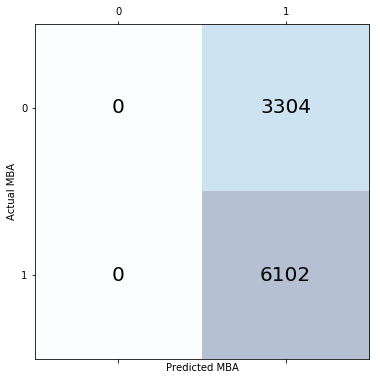

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fix, ax = plt.subplots(figsize=(6,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
               va='center',ha='center',size=20)
plt.xlabel('Predicted MBA')
plt.ylabel('Actual MBA')
plt.show()

#### Precision/Recall Curve

In [108]:
y_scores = cross_val_predict(svm_clf,X_train,y_train,cv=5,method='decision_function')
from sklearn.metrics import precision_recall_curve
y_train_bin = np.where(y_train=="mba",1,0)
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores)

KeyboardInterrupt: 

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

#### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict
# y_scores = cross_val_predict(lr_clf,X_train,y_train,cv=5)
y_scores = cross_val_predict(svm_clf,X_train,y_train,cv=5,method='decision_function')

In [ ]:
y_train_bin = np.where(y_train=="mba",1,0)
# y_scores_bin = np.where(y_scores=="mba",1,0)
fpr,tpr,thresholds = roc_curve(y_train_bin,y_scores,pos_label=1)

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
roc_auc_score(y_train_bin,y_scores)

In [43]:
# pipe_svc = Pipeline([('vect', CountVectorizer()),
#                       ('tfidf', TfidfTransformer()),
#                      ('clf',SVC(random_state=1))])

# param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# param_grid = [{'clf__C': param_range, 
#                'clf__kernel': ['linear']},
#                  {'clf__C': param_range, 
#                   'clf__gamma': param_range, 
#                   'clf__kernel': ['rbf']}]

# gs = GridSearchCV(estimator=pipe_svc, 
#                   param_grid=param_grid, 
#                   scoring='accuracy', 
#                   cv=10,
#                   n_jobs=-1)

# gs = gs.fit(X_train, y_train)
# print(gs.best_score_)
# print(gs.best_params_)

In [60]:
# clf = gs.best_estimator_
# clf.fit(X_train, y_train)
# print('Test accuracy: %.3f' % clf.score(X_test, y_test))

## Stochastic Gradient Descent

The Stochastic Gradient Descent (SGD) classifier can handle large datasets efficiently due to....

**Hyperparameters explored:**
    * Alpha (alpha):
    * Penalty (penalty):
    * Loss (loss):

In [178]:
from sklearn.linear_model import SGDClassifier
sgd_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(class_weight='balanced',
                                            n_jobs=-1,random_state=1))])

parameters = {'clf__alpha': [0.0001,0.001, 0.01, 0.1, 1],
             'clf__penalty': ['l2','l1','elasticnet'],
             'clf__loss': ['hinge', 'log']
}

sgd_clf = GridSearchCV(sgd_clf, param_grid=parameters, scoring='roc_auc',n_jobs=-1,cv=10,verbose=10)

In [179]:
sgd_clf.fit(X_train, y_train)
print('Train Accuracy: %.3f' % sgd_clf.score(X_train, y_train))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2, score=0.936460, total=   1

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s


[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2, score=0.938293, total=   1.8s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2, score=0.929648, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2, score=0.933246, total=   1.8s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2, score=0.931342, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2, score=0.930615, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1 .............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2,

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.9s


[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1, score=0.926198, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet .....
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet .....
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l2, score=0.929098, total=   2.1s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1, score=0.926523, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet .....
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet .....
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1, score=0.920972, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet .....
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1, score=0.918930, total=   1.8s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1, score=0.919284, total=   1.7s
[CV] clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet .....
[CV] clf__loss=hinge, clf__alpha=0.0001,

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s


[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=l1, score=0.917752, total=   2.0s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.934323, total=   1.9s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.934223, total=   1.9s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.930663, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.928412, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.936563, total=   1.7s


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.5s


[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.928275, total=   1.8s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.926459, total=   1.8s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.929752, total=   1.9s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l2 ...............
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l1 ...............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l2, score=0.934362, total=   1.8s
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l2, score=0.933624, total=   1.7s
[CV]  clf__loss=hinge, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.931328, total=   2.1s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l1 ...............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l2, score=0.928630, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l1 ............

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.9s


[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l2, score=0.927955, total=   1.9s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=l1 ...............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l2, score=0.929867, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet .......
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l1, score=0.920733, total=   1.9s
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l2, score=0.925855, total=   1.9s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet .......
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet .......
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l1, score=0.916455, total=   1.9s
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l1, score=0.919734, total=   1.9s
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l1, score=0.923096, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet .......
[CV] clf__loss=log, clf__alpha=0.000

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   15.6s


[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l1, score=0.914108, total=   1.7s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2 ..............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=l1, score=0.911631, total=   2.0s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2 ..............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.925560, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2 ..............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.930854, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2 ..............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.931368, total=   2.0s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2 ..............
[CV]  clf__loss=log, clf__alpha=0.0001, clf__penalty=elasticnet, score=0.924227, total=   2.1s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2 ..............
[CV]  clf__loss=log,

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   20.8s


[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2, score=0.923537, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1 ..............
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2, score=0.917912, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1 ..............
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2, score=0.925562, total=   1.7s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1 ..............
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2, score=0.918047, total=   1.9s
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2, score=0.913954, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1 ..............
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1 ..............
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l2, score=0.921829, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1 ..............
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   24.8s


[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1, score=0.896492, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=elasticnet ......
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1, score=0.886717, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=elasticnet ......
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1, score=0.892651, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=elasticnet ......
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1, score=0.888031, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.001, clf__penalty=elasticnet ......
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1, score=0.880569, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l2 ................
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__penalty=l1, score=0.879469, total=   1.9s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l2 ................
[CV]  clf__loss=hinge, clf__alpha=0.001, clf__

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   28.8s


[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l1 ................
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l2, score=0.919876, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l1 ................
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l2, score=0.917370, total=   1.9s
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l2, score=0.912852, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l1 ................
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l1 ................
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l2, score=0.912847, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l1 ................
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l2, score=0.919447, total=   2.1s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l1 ................
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l2, score=0.908375, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=l1 ....

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   33.0s


[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l1, score=0.876255, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=elasticnet ........
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l1, score=0.881089, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=elasticnet ........
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l1, score=0.874510, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.001, clf__penalty=elasticnet ........
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l1, score=0.869015, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2 ...............
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=l1, score=0.870259, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2 ...............
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalty=elasticnet, score=0.910883, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2 ...............
[CV]  clf__loss=log, clf__alpha=0.001, clf__penalt

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   38.8s


[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2, score=0.898734, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l1 ...............
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2, score=0.899639, total=   1.7s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l1 ...............
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2, score=0.905567, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l1 ...............
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2, score=0.894893, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l1 ...............
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2, score=0.902496, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.01, clf__penalty=l1 ...............
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2, score=0.896905, total=   1.7s
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l2, score=0.906459, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.0

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   43.5s


[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=elasticnet, score=0.887644, total=   1.8s
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=l1, score=0.785793, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=l2 .................
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=l2 .................
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=elasticnet, score=0.881824, total=   1.9s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=l2 .................
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=elasticnet, score=0.884136, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=l2 .................
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=elasticnet, score=0.884139, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=l2 .................
[CV]  clf__loss=hinge, clf__alpha=0.01, clf__penalty=elasticnet, score=0.889097, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=l2 .................
[CV]  clf__l

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   49.0s


[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=l2, score=0.898418, total=   1.7s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=l1 .................
[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=l2, score=0.903828, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=elasticnet .........
[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=l2, score=0.898475, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=elasticnet .........
[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=l1, score=0.702023, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=elasticnet .........
[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=l1, score=0.694893, total=   1.8s
[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=l1, score=0.705537, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=elasticnet .........
[CV] clf__loss=log, clf__alpha=0.01, clf__penalty=elasticnet .........
[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=l1, score=0.7

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   54.4s


[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1 ................
[CV]  clf__loss=log, clf__alpha=0.01, clf__penalty=elasticnet, score=0.863289, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1 ................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l2, score=0.903058, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1 ................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l2, score=0.899290, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1 ................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l2, score=0.896665, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1 ................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l2, score=0.898031, total=   1.9s
[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1 ................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l2, score=0.903321, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  1.0min


[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=0.1, clf__penalty=elasticnet ........
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   1.8s
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=l2 ..................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=elasticnet, score=0.694893, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=l2 ..................
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=l2 ..................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=elasticnet, score=0.772857, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=l2 ..................
[CV]  clf__loss=hinge, clf__alpha=0.1, clf__penalty=elasticnet, score=0.709890, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=l2 ..................
[CV]  clf__loss=hinge, clf__alpha=

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  1.1min


[CV]  clf__loss=log, clf__alpha=0.1, clf__penalty=l2, score=0.894719, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=elasticnet ..........
[CV]  clf__loss=log, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   1.7s
[CV]  clf__loss=log, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=elasticnet ..........
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=elasticnet ..........
[CV]  clf__loss=log, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   1.8s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=elasticnet ..........
[CV]  clf__loss=log, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   1.8s
[CV]  clf__loss=log, clf__alpha=0.1, clf__penalty=l1, score=0.500000, total=   2.0s
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=elasticnet ..........
[CV] clf__loss=log, clf__alpha=0.1, clf__penalty=elasticnet ..........
[CV]  clf__loss=log, clf__alpha=0.1, clf__penalty=l1, score=0.500000, 

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:  1.2min


[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=l2, score=0.899290, total=   1.9s
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=l2, score=0.896665, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=1, clf__penalty=l1 ..................
[CV] clf__loss=hinge, clf__alpha=1, clf__penalty=l1 ..................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=l2, score=0.898031, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=1, clf__penalty=l1 ..................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=l2, score=0.903321, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=1, clf__penalty=l1 ..................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=l2, score=0.891119, total=   1.8s
[CV] clf__loss=hinge, clf__alpha=1, clf__penalty=l1 ..................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=l2, score=0.893601, total=   1.7s
[CV] clf__loss=hinge, clf__alpha=1, clf__penalty=l1 ..................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=l2, score=0.894515, 

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.3min


[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=elasticnet, score=0.500000, total=   1.9s
[CV] clf__loss=log, clf__alpha=1, clf__penalty=l2 ....................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=elasticnet, score=0.500000, total=   1.8s
[CV] clf__loss=log, clf__alpha=1, clf__penalty=l2 ....................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=elasticnet, score=0.500000, total=   1.9s
[CV] clf__loss=log, clf__alpha=1, clf__penalty=l2 ....................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=elasticnet, score=0.500000, total=   1.8s
[CV] clf__loss=log, clf__alpha=1, clf__penalty=l2 ....................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=elasticnet, score=0.500000, total=   1.9s
[CV] clf__loss=log, clf__alpha=1, clf__penalty=l1 ....................
[CV]  clf__loss=hinge, clf__alpha=1, clf__penalty=elasticnet, score=0.500000, total=   1.9s
[CV] clf__loss=log, clf__alpha=1, clf__penalty=l1 ....................
[CV]  clf__loss=log, c

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


Train Accuracy: 0.952


In [180]:
sgd_clf.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...      penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False))])

In [181]:
sgd_clf.best_params_

{'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__penalty': 'l2'}

In [ ]:
# sgd_clf.best_params_
# {'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__penalty': 'l2'}

In [ ]:
# sgd_clf.fit(X_train, y_train)

In [ ]:
# print('Test Accuracy: %.3f' % sgd_clf.score(X_test, y_test))

#### Performance Metrics

In [105]:
from sklearn import metrics
y_train_pred = sgd_clf.predict(X_train)
y_pred = sgd_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred,
                       target_names=sgd_clf.classes_))

              precision    recall  f1-score   support

data_science       0.91      0.65      0.76      1861
         mba       0.89      0.98      0.93      5276

 avg / total       0.89      0.89      0.88      7137



#### Confusion Matrix

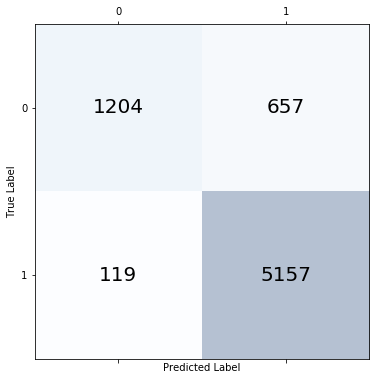

In [106]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fix, ax = plt.subplots(figsize=(6,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
               va='center',ha='center',size=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Precision-Recall Curve

In [107]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=5,method='decision_function')

In [108]:
from sklearn.metrics import precision_recall_curve
y_train_bin = np.where(y_train=="mba",1,0)
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores)

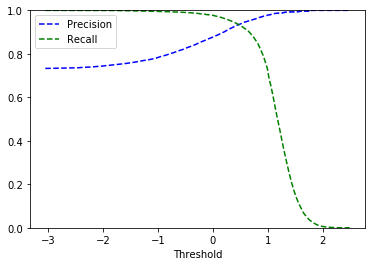

In [109]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

#### ROC Curve

In [110]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y_train_bin,y_scores)

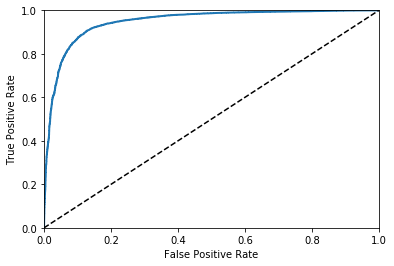

In [111]:
plot_roc_curve(fpr,tpr)
plt.show()

In [112]:
roc_auc_score(y_train_bin,y_scores)

0.94776300753975118

## Random Forests

Random forests fall under the 'ensemble' family of machine learning classifiers.  The model takes a random sample of observations as well as a random subset of features during training which it uses to build decision trees.  

**Hyperparameters explored**:
    * Tree size (n_estimators):
        * This parameter specifies the number of trees to be fitted in order to take the aggregate decision (max vote or average prediction).
        * Increasing the tree size will generally improve model accuracy but slow completion time.
    * Max Features (max_features):
        * This parameter specifies the maximum number of features the model uses in fitting individual trees.
        * Increasing the max features will typically improve model performance as a higher number of features are being used to fit at each decision node, however doing so will lower the diversity of the tree (and lead to overfitting).
        * The more features used, the longer the model will take to train.
        * Parameter Options include:
            * Use all features (Auto/None)
            * Use the square root of the number of features (sqrt)
            * Use the base log number of features (log2)
            * Use a specified percent of the number of features (0.X)
    * Minimum sample leaf (min_sample_leaf):
        * This parameter limits the minimum leaf (or end node) size of the decision tree.
        * Typically larger leaves capture less noise in the training data.
    * Decision criterion (criterion):
        * This parameter is the method by which predictions are made by our classifier.
            * Gini Index:
                * A measure of node purity.  Smaller values indicate node purity, larger values indicate node impurity.
                * For a split to take place, the Gini index for a child node should be less than that of the parent node.
            * Entropy:
                * A measure of node *impurity.* This value ranges between 0 and 1, where 0.5 indicates maximum impurity and the highest uncertainty of making a decision.

Depth parameter

In [182]:
from sklearn.ensemble import RandomForestClassifier
# forest_clf = RandomForestClassifier(random_state=42)
forest_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier(class_weight='balanced',
                                                     random_state=1))])


parameters = {'clf__n_estimators': [10,50,100,500,1000],
             'clf__max_features': ["auto","sqrt","log2"],
             'clf__min_samples_leaf': [50,100,200,500],
             'clf__criterion': ['gini','entropy']}

forest_clf = GridSearchCV(forest_clf, param_grid=parameters, scoring='roc_auc',n_jobs=-1,cv=10,verbose=10)

In [183]:
forest_clf.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV] clf__min_samples_leaf=50, clf__max_features=auto

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s


[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.886812, total=   2.0s
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.867710, total=   2.0s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.877137, total=   2.1s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.896281, total=  

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.2s


[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.879416, total=   2.1s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.907664, total=   3.0s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.915019, total=   3.3s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.907494, total=   3.0s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_esti

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.4s


[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.902764, total=   3.4s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.910240, total=   4.4s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.916878, total=   4.2s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.912140, total=   4.5s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_e

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s


[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.910519, total=   4.4s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.908975, total=   4.6s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.906094, total=   4.7s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500, score=0.915572, total=  14.8s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.8s


[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500, score=0.910512, total=  15.2s
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500, score=0.913529, total=  15.6s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000 
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500, score=0.908387, total=  15.4s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.866271, total=   1.9s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   52.6s


[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.918858, total=  28.4s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.916889, total=  28.7s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.857005, total=   2.0s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.867273, total=   2.1s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf_

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.1min


[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.888556, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.908130, total=  27.6s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.897188, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.905445, total=  28.4s
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.913955, total=  28.2s
[CV] clf__min_samples_leaf=100, clf__max_featur

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.3min


[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.908502, total=  28.4s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.903323, total=   3.6s
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.905571, total=   3.6s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.897245, total=   3.5s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gin

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.5min


[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500, score=0.902931, total=  11.0s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.837990, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.822626, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.852350, total=   2.1s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.9min


[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.888264, total=   2.5s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.889477, total=   2.5s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.872814, total=   2.4s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.878751, total=   2.6s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=gini, clf__n

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  2.1min


[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.893454, total=   3.1s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.892153, total=   3.2s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.881852, total=   3.1s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.882761, total=   3.1s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini,

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.3min


[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500, score=0.890455, total=   8.4s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.767591, total=   1.8s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.735421, total=   1.8s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=10, score=0.757292, total=   1.9s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  2.6min


[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50, score=0.849925, total=   2.2s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.890747, total=  13.8s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.897769, total=  13.7s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.891812, total=  13.4s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gin

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.8min


[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.845488, total=   2.5s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.836070, total=   2.5s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=100, score=0.857695, total=   2.5s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=500, score=0.879991, total=   5.3s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gin

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  3.1min


[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.883409, total=   2.2s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.867710, total=   2.0s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.896281, total=   2.0s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=gini, clf__n_estimators=1000, score=0.884805, total=   9.3s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estim

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  3.3min


[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50, score=0.902942, total=   3.1s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50, score=0.902764, total=   3.1s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100, score=0.910240, total=   4.3s
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100, score=0.916878, total=   4.2s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_es

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:  3.8min


[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.883086, total=   2.0s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.872828, total=   2.0s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.857159, total=   2.0s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.883677, total=   2.0s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  4.3min


[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.905445, total=  27.4s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100, score=0.907359, total=   3.6s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.915010, total=  27.5s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.916365, total=  27.2s
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100, score=0.906011, total=   3.6s
[CV] clf__min_samples_leaf=100, clf__max_feat

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  4.6min


[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500, score=0.902931, total=  10.9s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.837990, total=   2.1s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.822626, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.852350, total=   2.0s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:  5.1min


[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.908960, total=  19.8s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.901431, total=  19.8s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.908639, total=  20.8s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50, score=0.867113, total=   2.5s
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.901906, total=  19.9s
[CV] clf__min_samples_leaf=200, clf__max_f

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  5.5min


[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.735421, total=   1.8s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.757292, total=   2.1s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10, score=0.729279, total=   1.9s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.904106, total=  13.7s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=gini, clf_

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:  5.8min


[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50, score=0.810660, total=   2.2s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=50, score=0.852087, total=   2.1s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100, score=0.833411, total=   2.6s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=100, score=0.854717, total=   2.4s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, 

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  6.2min


[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10, score=0.595139, total=   1.8s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10, score=0.542482, total=   1.7s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.876698, total=   8.9s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=gini, clf__n_estimators=1000, score=0.884805, total=   9.3s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_es

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.4min


[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100, score=0.820986, total=   2.5s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100, score=0.833030, total=   2.3s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100, score=0.788124, total=   2.3s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500, score=0.878325, total=   4.6s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  6.8min


[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50, score=0.708261, total=   2.2s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000, score=0.883364, total=   7.4s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000, score=0.903434, total=   7.7s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000, score=0.889101, total=   7.3s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, c

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  7.1min


[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500, score=0.871115, total=   4.4s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500, score=0.848350, total=   4.9s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10, score=0.604836, total=   2.0s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10, score=0.499238, total=   2.5s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=gini, clf_

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  7.5min


[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100, score=0.730292, total=   2.4s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100, score=0.741025, total=   2.3s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100, score=0.672248, total=   2.3s
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=100, score=0.724418, total=   2.5s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500 
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  7.9min


[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000, score=0.864103, total=   7.5s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=10, score=0.535780, total=   1.8s
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000, score=0.847806, total=   7.1s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000, score=0.860894, total=   7.2s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=gini, 

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  8.2min


[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=500, score=0.769553, total=   4.9s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10, score=0.888776, total=   2.3s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10, score=0.896938, total=   2.2s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=gini, clf__n_estimators=1000, score=0.804505, total=   6.9s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criteri

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  8.6min


[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.902931, total=   5.2s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.911349, total=   5.1s
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.908050, total=   5.2s
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.913890, total=   4.9s
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV] clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf_

[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=50, score=0.905525, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=50, score=0.889802, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100 


[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed:  9.6min


[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=50, score=0.895012, total=   3.1s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000, score=0.914145, total=  33.1s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.905894, total=   4.0s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.908644, total=   3.9s
[CV] clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=aut

[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10, score=0.851535, total=   2.0s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10, score=0.836614, total=   2.0s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 


[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 10.3min


[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000, score=0.912108, total=  23.7s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000, score=0.912161, total=  23.8s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10, score=0.840359, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10, score=0.848714, total=   2.0s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto,

[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.892989, total=   8.4s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.896719, total=   8.6s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.900977, total=   8.7s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.891315, total=   8.5s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 


[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 10.9min


[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.901092, total=   8.6s
[CV] clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.893739, total=   9.1s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.894857, total=   8.6s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10, score=0.767591, total=   1.9s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto

[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.878039, total=   2.4s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.864278, total=   2.6s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.852383, total=   2.5s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.845249, total=   2.5s
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.863729, total=   2.6s
[CV] clf__min_samples

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 11.3min


[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.855236, total=   2.7s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=100, score=0.856632, total=   2.5s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.880854, total=   5.4s
[CV] clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=auto, clf__criterion=entropy, clf__n_estimators=500, score=0.880748, total=   5.7s
[CV] clf__min_samples_leaf=500, clf__max_features

[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.906949, total=   3.5s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.905333, total=   3.4s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.900049, total=   3.5s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.908440, total=   3.5s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__crit

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 11.9min


[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.903351, total=   3.4s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.902757, total=   3.5s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100, score=0.918372, total=   4.8s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100, score=0.906656, total=   4.8s
[CV] clf__min_samples_leaf=50, clf__max_features=sqrt, clf__cr

[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.901366, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.903106, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.895204, total=   2.9s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.896923, total=   2.9s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf_

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 12.9min


[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.905525, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.889802, total=   2.8s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.895012, total=   2.9s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100, score=0.905894, total=   4.0s
[CV] clf__min_samples_leaf=100, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=50, clf__max_features=sqrt,

[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10, score=0.850783, total=   2.0s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10, score=0.856382, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10, score=0.851535, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10, score=0.836614, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=100, clf__max_features=sqrt, clf

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 13.7min


[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10, score=0.848714, total=   1.9s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.887010, total=   2.4s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.879250, total=   2.5s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50, score=0.884462, total=   2.4s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=50 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf

[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000 
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500, score=0.900977, total=   8.8s
[CV] clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500, score=0.901092, total=   8.5s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500, score=0.893739, total=   9.0s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, c

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 14.4min


[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000, score=0.904240, total=  15.5s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=200, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000, score=0.901710, total=  15.2s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10, score=0.775615, total=   2.0s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10, score=0.832306, total=   1.9s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt,

[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=100, score=0.856632, total=   2.5s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500, score=0.880748, total=   5.5s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500, score=0.882635, total=   5.5s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500, score=0.880854, total=   5.5s
[CV] clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_featur

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 14.9min


[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=500, score=0.872168, total=   5.6s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=10, score=0.619444, total=   1.9s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=10, score=0.623035, total=   1.9s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__criterion=entropy, clf__n_estimators=1000, score=0.885847, total=   9.2s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=10 
[CV]  clf__min_samples_leaf=500, clf__max_features=sqrt, clf__c

[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.806402, total=   2.3s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.797081, total=   2.5s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.820807, total=   2.4s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_esti

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 15.4min


[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.897069, total=   4.7s
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.887828, total=   4.8s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.881092, total=   4.9s
[CV] clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=50, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.876062, total=   4.6s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, 

[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.763971, total=   2.2s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.742796, total=   2.3s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.770527, total=   2.2s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.753302, total=   2.6s
[CV] clf__min_samples_leaf=100, clf__max_features=lo

[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 15.9min


[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.871059, total=   4.6s
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.845357, total=   4.4s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.852142, total=   4.6s
[CV] clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.871064, total=   4.6s
[CV]  clf__min_samples_leaf=100, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.843463, total=   4.7s
[CV] clf__min_samp

[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=50, score=0.651613, total=   2.1s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=50, score=0.587596, total=   2.1s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=50, score=0.650101, total=   2.1s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.730129, total=   2.4s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2

[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 16.3min


[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.695857, total=   2.4s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.829875, total=   4.5s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.813770, total=   4.5s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.830535, total=   4.5s
[CV] clf__min_samples_leaf=200, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=200, clf__max_featur

[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=50, score=0.585946, total=   2.0s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=50, score=0.648661, total=   2.1s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=50, score=0.559661, total=   2.2s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=50, score=0.622728, total=   2.0s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2,

[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 16.8min


[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.593786, total=   2.2s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.543336, total=   2.5s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=100, score=0.642040, total=   2.3s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=500, score=0.740002, total=   4.4s
[CV] clf__min_samples_leaf=500, clf__max_features=log2, clf__criterion=entropy, clf__n_estimators=1000 
[CV]  clf__min_samples_leaf=500, clf__max_feature

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 17.2min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__min_samples_leaf': [50, 100, 200, 500], 'clf__max_features': ['auto', 'sqrt', 'log2'], 'clf__criterion': ['gini', 'entropy'], 'clf__n_estimators': [10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=10)

In [184]:
print('Train Accuracy: %.3f' % forest_clf.score(X_train, y_train))
y_pred = forest_clf.predict(X_train)

Train Accuracy: 0.921


In [185]:
forest_clf.best_params_

{'clf__criterion': 'entropy',
 'clf__max_features': 'auto',
 'clf__min_samples_leaf': 50,
 'clf__n_estimators': 1000}

In [ ]:
# forest_clf.best_params_
# {'clf__criterion': 'entropy',
#  'clf__max_features': 'auto',
#  'clf__min_samples_leaf': 50,
#  'clf__n_estimators': 1000}

In [186]:
forest_clf.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...timators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))])

#### Performance Metrics

In [116]:
from sklearn import metrics
y_train_pred = forest_clf.predict(X_train)
y_pred = forest_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred,
                       target_names=sgd_clf.classes_))

              precision    recall  f1-score   support

data_science       0.88      0.83      0.85      1861
         mba       0.94      0.96      0.95      5276

 avg / total       0.92      0.92      0.92      7137



#### Confusion Matrix

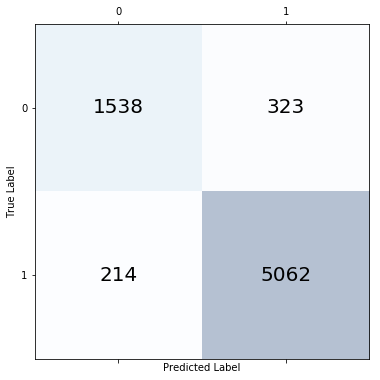

In [117]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fix, ax = plt.subplots(figsize=(6,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
               va='center',ha='center',size=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Precision-Recall Curve

In [118]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train,cv=5,method="predict_proba")
y_scores_forest = y_probas_forest[:,1]

In [119]:
from sklearn.metrics import precision_recall_curve
y_train_bin = np.where(y_train=="mba",1,0)
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores_forest)

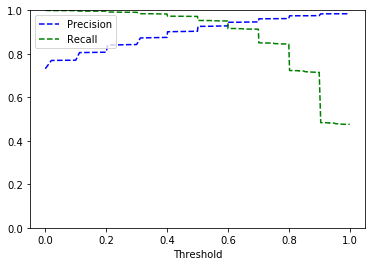

In [120]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

#### ROC Curve

In [121]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_bin,y_scores_forest)

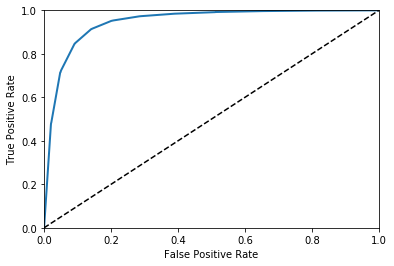

In [122]:
plot_roc_curve(fpr_forest,tpr_forest)
plt.show()

In [123]:
roc_auc_score(y_train_bin,y_scores_forest)

0.94573923706369523

# Learning Ensembles

In machine learning, it is possible to aggregate the predictions or classifications from a group of models and create new, hopefully superior performing 'ensemble' model. One can take a variety of very different types of models, like the ones we explored above. In fact, it is often better if the underlying models in an ensemble are quite different in nature as a more diverse set of learning is used and the lower the chance that they will make the same types of errors. Even if an individual classifer is weak on its own, it can contribute to a much stronger performing model through ensembling.

We will perform this ensembling by training and tuning the following types of ensemble models:
* Voting Classifier
* Adaboost Classifier
* Gradient Boosting Classifier
* Stacking Classifier

## Voting Classifier

A voting classifer aggregates the predictions or classifications of various underlying classifiers and makes its prediction based on the class that gets the most votes.

There are two types of voting classifiers:
* Hard Voting:
  * Counts the votes of each classifier in the ensemble and selects the class that receives the most votes.
* Soft Voting:
  * Calculates the average estimated class probability for each class and chooses the class with the highest probability.
  * This approach often produces better results, however it only works if all classifiers in the ensemble can produce class probabilities.  In our case, all classifiers can estimate class probabilities, so we will explore this voting option.

One of the most interesting aspects of Voting Classifiers is the fact that we can find optimal values of the hyperparameters of our individual models to achieve the best performance.  While we already tuned our individual models' hyperparameters, we will once again utilize grid search in our voting classifier to see if we can make further performance gains.


In [124]:
from sklearn.ensemble import VotingClassifier

In [159]:
voting_clf = Pipeline([('clf', VotingClassifier(estimators=[('lr',lr_clf),('knn',knn_clf),
                                                            ('nb',nb_clf),('svm',svm_clf),('sgd',sgd_clf),
                                                              ('rf',forest_clf)],voting="soft"))])
voting_clf.fit(X_train,y_train)

Pipeline(steps=[('clf', VotingClassifier(estimators=[('lr', Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, st...mators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))]))],
         n_jobs=1, voting='soft', weights=None))])

In [160]:
print('Test Accuracy: %.3f' % voting_clf.score(X_test, y_test))

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [148]:
from sklearn.metrics import accuracy_score
for clf in (lr_clf,knn_clf,nb_clf,svm_clf,sgd_clf,forest_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf,accuracy_score(y_test,y_pred))
#     print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]) 0.923217037971
Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...owski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'))]) 0.903180608099
Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='

#### Performance Metrics

In [154]:
from sklearn import metrics
y_train_pred = voting_clf.predict(X_train)
y_pred = voting_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred,
                       target_names=voting_clf.classes_))

              precision    recall  f1-score   support

data_science       0.91      0.82      0.86      1861
         mba       0.94      0.97      0.95      5276

 avg / total       0.93      0.93      0.93      7137



#### Confusion Matrix

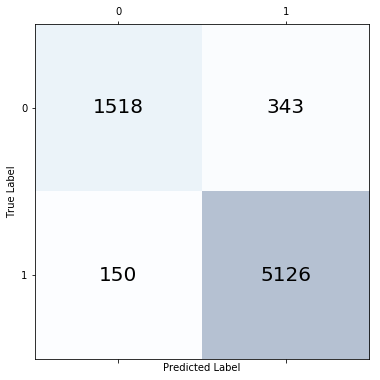

In [155]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fix, ax = plt.subplots(figsize=(6,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],
               va='center',ha='center',size=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Precision/Recall Curve

In [158]:
y_probas_voting = cross_val_predict(voting_clf,X_train,y_train,cv=5,method="predict_proba")
y_scores_voting = y_probas_voting[:,1]

AttributeError: 'VotingClassifier' object has no attribute 'decision_function'

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_bin = np.where(y_train=="mba",1,0)
precisions,recalls,thresholds = precision_recall_curve(y_train_bin,y_scores_voting)

#### ROC Curve

## Adaboost

With Adaboost, the mistakes of various individual classifiers are used to improve the performance of the next classifier.  

First a classifier is trained and fitted and the relative weights of misclassified training instances is increased thereby forcing the model to pay more attention to the cases which the prior model underfitted.

Then a second classifier is trained using the updated weights and the cycle repeats.

Learning Rate:
* If our Adaboost ensemble underfits the training data, we can try increasing the learning rate.

## Gradient Boosting

Similar to Adaboost, Gradient Boosting iterively fits individual models and changes accordingly.

Instead of updating weights based on misclassifications like Adaboost, Gradient Boosting attempts to fit the next classifier to the residual errors of the predeceding model.

**Hyperparameters explored:**
    * Learning Rate:
        * The learning_rate is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage
        * If our Adaboost ensemble underfits the training data, we can try increasing the learning rate.

    * Early Stopping:
        * This is used to find the right number of predictors.

# Exploring the Worst Predictions

In this section, we will use the predictions from our best classifier (logistic regression with 5-fold cross validation) to find the descriptions which the model most narrowly classified.

In [ ]:
#export predictions
prediction_probs = pd.DataFrame(text_clf.predict_proba(descriptions_train))
prediction_probs.columns = text_clf.classes_

from matplotlib import pyplot as plt

plt.figure(figsize=(18,10))

x = prediction_probs['data_science']
y = prediction_probs['mba']

bins = np.linspace(0, 1, 100)

plt.hist(x, bins, alpha=0.5, label='data_science')
plt.hist(y, bins, alpha=0.5, label='mba')
plt.legend(loc='upper right',prop={'size':20})
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

If you group the probabilities into ranges, we can see that around 6% of our data lie within the most indecisive probability intervals (45%-55%).  Within these two ranges, only 56% and 47% of predictions were correct.  These are the most inaccurate of our predictions and therefore the hardest to classify within our two categories.

In [ ]:
prediction_probs['predicted'] = np.where(prediction_probs['data_science']>
                                        prediction_probs['mba'],"data_science","mba")
prediction_probs['actual'] = pd.DataFrame(categories_train).reset_index()['category']
prediction_probs['correct'] = np.where(prediction_probs['predicted']==
                                        prediction_probs['actual'],1,np.NaN)
prob_dist = (pd.DataFrame(prediction_probs
                          .groupby(pd.cut(prediction_probs["data_science"], 
                   np.arange(0, 1.05, .05),include_lowest=True))
                          .agg({"data_science":"count",
                               "correct":"sum"})))
prob_dist.columns = ["count_correct","count"]
prob_dist['pct'] = prob_dist['count']/len(prediction_probs)
prob_dist['pct_correct'] = prob_dist['count_correct']/prob_dist['count']
prob_dist.reset_index(inplace=True)
prob_dist.columns = ["probability_interval","count_correct","count","pct","pct_correct"]

In [ ]:
prob_dist

### View Misclassified Descriptions

In [ ]:
df_predicted_wrong_all = pd.concat([df_predicted_wrong_gs,
                             df_predicted_wrong_lr,
                             df_predicted_wrong_nb,
                             df_predicted_wrong_svm])

In [ ]:
df_predicted_wrong_all.drop_duplicates(keep='last',inplace=True)

In [ ]:
df_predicted_wrong_all.shape